In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
Bank_AD=pd.read_csv("application_data.csv")
Bank_PD=pd.read_csv("previous_application.csv")

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Checking the Structure of Data

In [5]:
Bank_AD.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
Bank_AD.shape

(307511, 122)

In [7]:
Bank_AD.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
Bank_AD.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
Bank_AD.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
null_cols=Bank_AD.isnull().sum()
null_cols

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
50/100*len(Bank_AD)

153755.5

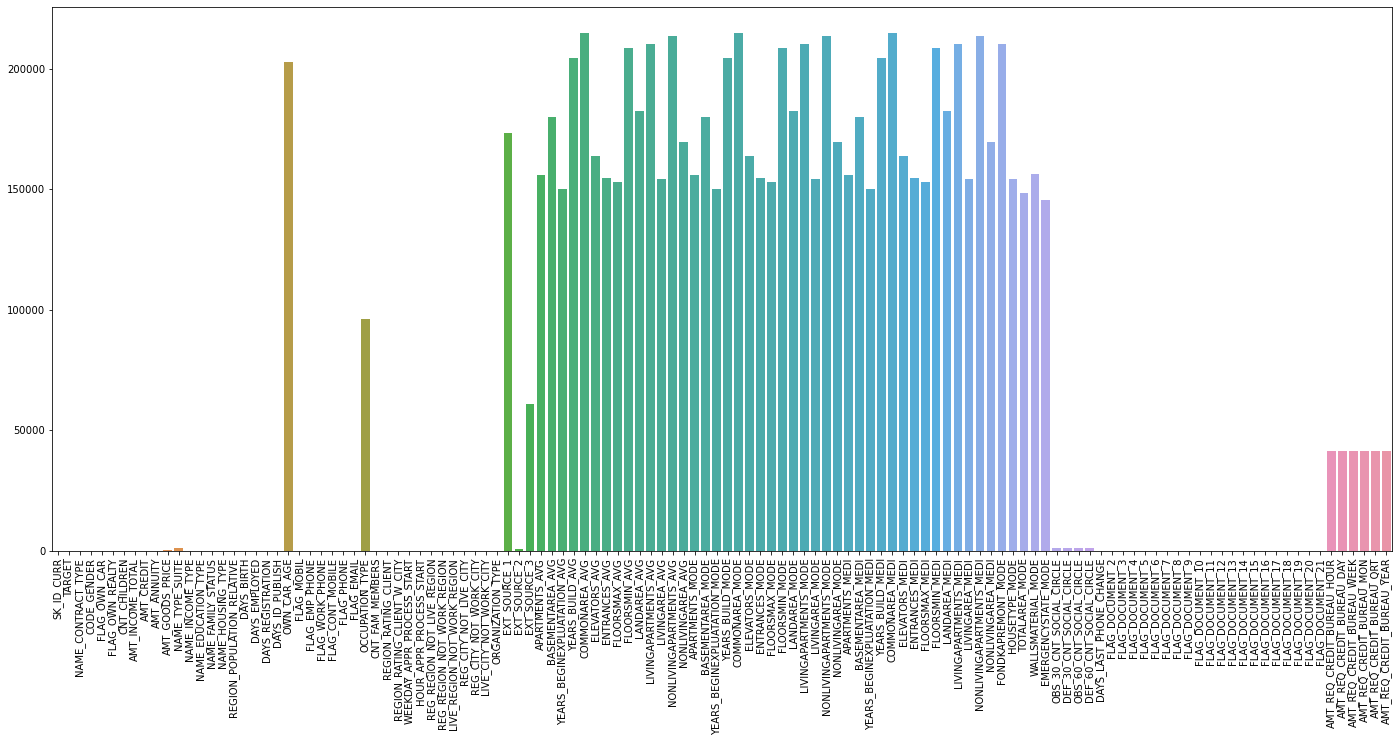

In [12]:
plt.figure(figsize=[24,10])
sns.barplot(x=Bank_AD.columns,y=Bank_AD.isnull().sum())
plt.xticks(rotation=90)
plt.show()

Plot to depict count of null values in each columns

In [13]:
null_cols_names=list(null_cols[null_cols>153755.5].index)
len(null_cols_names)

41

## Dropping columns which have more than 50% of null values

In [14]:
df = Bank_AD.drop(columns=null_cols_names)
df.shape

(307511, 81)

In [15]:
(df.isnull().sum()/len(df)*100).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [16]:
13/100*(len(df))

39976.43

### Finding columns which have less than or equal to 13% of null values

In [17]:
less_null_cols_names=list(null_cols[(null_cols>0) & (null_cols<=39976.43)].index)
len(less_null_cols_names)
less_null_cols_names

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [18]:
dict={}
for i in less_null_cols_names:
    dict[i]=df[i].isnull().sum()
print(dict)

{'AMT_ANNUITY': 12, 'AMT_GOODS_PRICE': 278, 'NAME_TYPE_SUITE': 1292, 'CNT_FAM_MEMBERS': 2, 'EXT_SOURCE_2': 660, 'OBS_30_CNT_SOCIAL_CIRCLE': 1021, 'DEF_30_CNT_SOCIAL_CIRCLE': 1021, 'OBS_60_CNT_SOCIAL_CIRCLE': 1021, 'DEF_60_CNT_SOCIAL_CIRCLE': 1021, 'DAYS_LAST_PHONE_CHANGE': 1}


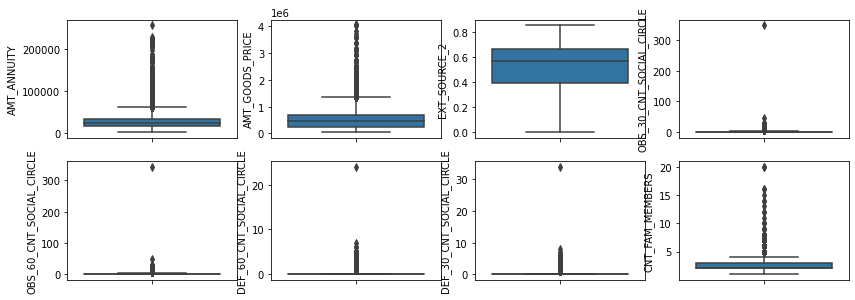

In [19]:
plt.figure(figsize=[14,10])

plt.subplot(441)
sns.boxplot(y=df.AMT_ANNUITY)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(442)
sns.boxplot(y=df.AMT_GOODS_PRICE)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(443)
sns.boxplot(y=df.EXT_SOURCE_2)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(444)
sns.boxplot(y=df.OBS_30_CNT_SOCIAL_CIRCLE)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(445)
sns.boxplot(y=df.OBS_60_CNT_SOCIAL_CIRCLE)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(446)
sns.boxplot(y=df.DEF_60_CNT_SOCIAL_CIRCLE)
#plt.subplots_adjust(hspace=1.5)
plt.subplot(447)
sns.boxplot(y=df.DEF_30_CNT_SOCIAL_CIRCLE)
#plt.subplots_adjust(hspace=0.5)
plt.subplot(448)
sns.boxplot(y=df.CNT_FAM_MEMBERS)
plt.show()

As we can see there are significant number of outliers in these columns, so the approach should be to take the median value of these variables and replacing null with median. Taking mean would be unfair because if the outlier values were not there the mean would have lied near about most of the values. Because of outlier the mean has surely gone significantly higher. So median consideration would be effective.

In [20]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [21]:
248526/307511*100

80.81857234375356

almost 81% of people came unaccompanied while seeking for loan. So we can replace the null values here with "Unaccompanied" i.e, the mode.

In [22]:
df[df["AMT_GOODS_PRICE"].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,0.9791,0.0417,0.9791,0.0417,0.9791,0.0417,0.0079,No,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289.0,-1948,1,1,1,1,1,1,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.464614,0.537070,0.9980,0.3333,0.9980,0.3333,0.9980,0.3333,0.1971,No,0.0,0.0,0.0,0.0,-476.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,-4132.0,-800,1,1,1,1,1,0,Accountants,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,0.565849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,-643.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,-3765.0,-572,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,0.645519,0.863363,0.9767,0.1667,0.9767,0.1667,0.9767,0.1667,0.0452,No,1.0,0.0,1.0,0.0,-1292.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,-4762.0,-506,1,1,1,1,1,0,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,0.552557,0.661024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-159.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,NaN,NaN,Working,Higher education,Single / not married,With parents,0.006296,-12390,-640,-6365.0,-3597,1,1,0,1,1,0,Managers,1.0,3,3,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.407925,0.240541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,0.0,-158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.0082

In [23]:
df.shape

(307511, 81)

In [24]:
df.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [25]:
df.select_dtypes("float").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [26]:
df.select_dtypes("int64").columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

In [27]:
columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


def convert(df, columns):
    for y in columns:
        df.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return df


convert(df,columns)
df.dtypes.value_counts()

object     45
float64    27
int64       9
dtype: int64

In [28]:
unwanted_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [29]:
df.shape

(307511, 39)

### Imbalance checking

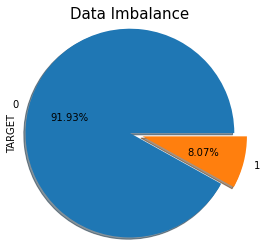

In [30]:
df.TARGET.value_counts(normalize=True).plot.pie(radius=1.2,autopct='%0.2f%%',shadow='True',explode=[0,0.15])
plt.title('Data Imbalance',fontsize=15)
plt.show()

1.More non defaulters than defaulters

In [31]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [32]:
#replacing XNA in gender with F as F has the highest percentage
df.CODE_GENDER[df.CODE_GENDER=='XNA']='F'

In [131]:
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

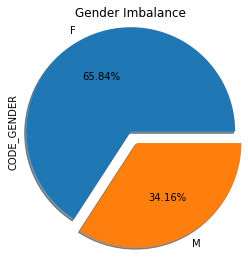

In [33]:
df.CODE_GENDER.value_counts(normalize=True).plot.pie(radius=1.2,autopct='%0.2f%%',shadow='True',explode=[0,0.15])
plt.title("Gender Imbalance")

plt.show()

1.Females are taking more loans than males.

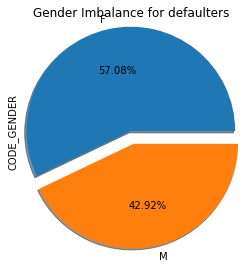

In [34]:
df.CODE_GENDER[df.TARGET==1].value_counts(normalize=True).plot.pie(radius=1.2,autopct='%0.2f%%',shadow='True',explode=[0,0.15])
plt.title("Gender Imbalance for defaulters")

plt.show()

1.Female defaulters are higher than males.

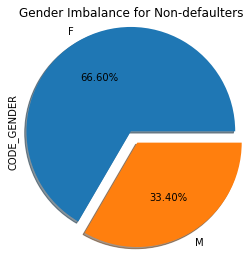

In [35]:
df.CODE_GENDER[df.TARGET==0].value_counts(normalize=True).plot.pie(radius=1.2,autopct='%0.2f%%',shadow='True',explode=[0,0.15])
plt.title("Gender Imbalance for Non-defaulters")
plt.show()

1.Female non-defaulters are higher than males.

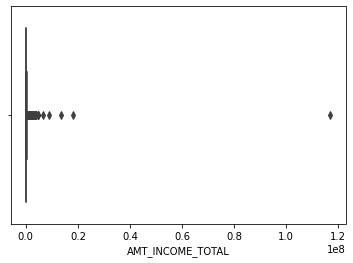

In [36]:
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

1.A significantly high outlier in the total income.We cannot ignore this because these are the kind of customers who are assets to the bank.

In [37]:
df[df.AMT_INCOME_TOTAL>100000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,Laborers,3.0,2,2,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df[df.AMT_ANNUITY>160000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12108,114122,0,Revolving loans,M,Y,Y,0,1080000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-15323,-6281,-2788.0,-4430,Managers,2.0,1,1,Bank,0.750889,NaN,0.0,0.0,0.0,0.0,-306.0,0.0,0.0,0.0,0.0,0.0,0.0
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,3825000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-19161,-989,-840.0,-2680,Managers,4.0,2,2,Business Entity Type 3,0.777754,0.654529,0.0,0.0,0.0,0.0,-470.0,0.0,0.0,0.0,0.0,0.0,1.0
15501,118093,0,Revolving loans,F,Y,Y,0,270000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,Rented apartment,0.010006,-19672,-12615,-10406.0,-3131,High skill tech staff,2.0,2,1,Industry: type 9,0.794677,0.667458,0.0,0.0,0.0,0.0,-308.0,0.0,0.0,0.0,0.0,0.0,0.0
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,-15176,-201,-1529.0,-4722,Managers,4.0,2,2,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
20119,123467,0,Revolving loans,F,Y,Y,0,675000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,Rented apartment,0.032561,-16004,-795,-4578.0,-4802,Managers,2.0,1,1,Business Entity Type 3,0.649701,0.150085,1.0,0.0,0.0,0.0,-1029.0,0.0,0.0,0.0,1.0,0.0,1.0
20338,123729,0,Cash loans,M,Y,N,0,540000.0,2303460.0,213291.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.072508,-13806,-5310,-3124.0,-4399,IT staff,2.0,1,1,Business Entity Type 1,0.592733,0.720944,0.0,0.0,0.0,0.0,-619.0,0.0,0.0,0.0,0.0,0.0,1.0
23556,127410,0,Cash loans,M,Y,N,0,900000.0,1800000.0,171040.5,1800000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.014520,-14759,-1684,-3563.0,-4493,Managers,2.0,2,2,Business Entity Type 3,0.600564,0.593718,0.0,0.0,0.0,0.0,-2422.0,0.0,0.0,0.0,2.0,0.0,4.0
23582,127443,0,Revolving loans,M,N,N,0,675000.0,2250000.0,225000.0,2250000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.035792,-21040,-2228,-3377.0,-4385,Managers,2.0,2,2,Self-employed,0.569975,0.698668,0.0,0.0,0.0,0.0,-703.0,0.0,0.0,0.0,0.0,0.0,0.0
24428,128414,0,Cash loans,F,Y,Y,0,585000.0,1800000.0,173704.5,1800000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13343,-3039,-7360.0,-3512,Laborers,2.0,2,2,Industry: type 3,0.609333,0.713631,4.0,0.0,4.0,0.0,-1696.0,0.0,0.0,0.0,1.0,0.0,3.0
32100,137221,0,Revolving loans,F,N,Y,1,405000.0,2250000.0,225000.0,2250000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.019689,-11285,-2508,-1106.0,-1057,Accountants,3.0,2,2,Other,0.597907,0.691021,0.0,0.0,0.0,0.0,-306.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
income_bins=[0,100000,200000,300000,400000,500000,20000000000]
income_labels=["<100000","100000-200000","200000-300000","300000-400000","400000-500000",">500000"]
df['INCOME_BUCKET'] = pd.cut(df.AMT_INCOME_TOTAL, bins=income_bins, labels=income_labels)

In [40]:
df.AMT_ANNUITY.max()

258025.5

In [41]:
annuity_bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000]
annuity_labels=["<25000","25000-50000","50000-75000","75000-100000","100000-125000","125000-150000","150000-175000","175000-200000","200000-225000","225000-250000",">250000"]
df['AMT_ANNUITY_Bucket'] = pd.cut(df.AMT_ANNUITY,bins=annuity_bins, labels=annuity_labels)

In [42]:
df.AMT_CREDIT.max()

4050000.0

In [43]:
credit_bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
credit_labels=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","800000-900000",">900000"]
df['CREDIT_BUCKET'] = pd.cut(df.AMT_CREDIT, bins=credit_bins, labels=credit_labels)

## UNIVARIATE ANALYSIS

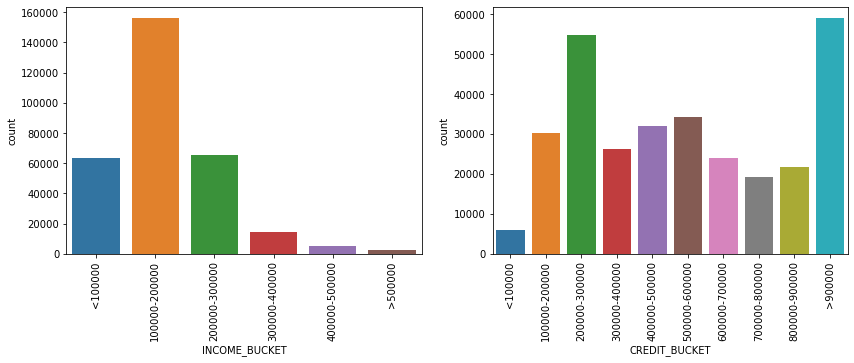

In [44]:
plt.figure(figsize=[14,10])
plt.subplot(221)
sns.countplot(df.INCOME_BUCKET)
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(df.CREDIT_BUCKET)
plt.xticks(rotation=90)
plt.show()

1.people in 100000-200000 have taken most loans

2.Most credit ranges above 900000

In [45]:
df['AGE'] =df['DAYS_BIRTH']//-365.25
#df.drop(['DAYS_BIRTH'],axis=1,inplace=True)
df['AGE_GROUP']= pd.cut(df.AGE,bins=np.linspace(20 ,70,num=11))

In [46]:
df.DAYS_ID_PUBLISH=df.DAYS_ID_PUBLISH.abs()
df.DAYS_BIRTH=df.DAYS_BIRTH.abs()
df.DAYS_EMPLOYED=df.DAYS_EMPLOYED.abs()
df.DAYS_REGISTRATION=df.DAYS_REGISTRATION.abs()
df.DAYS_LAST_PHONE_CHANGE=df.DAYS_LAST_PHONE_CHANGE.abs()

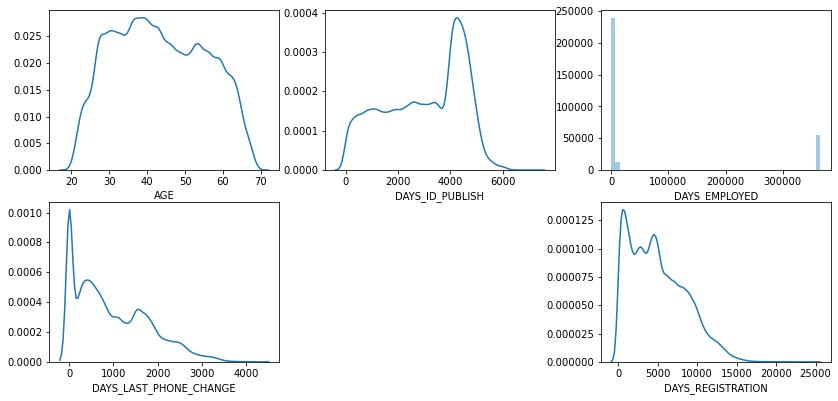

In [47]:
plt.figure(figsize=[14,10])
plt.subplot(331)
sns.distplot(df.AGE,hist=False)
plt.subplot(332)
sns.distplot(df.DAYS_ID_PUBLISH,hist=False)
plt.subplot(333)
sns.distplot(df.DAYS_EMPLOYED,kde=False)
plt.subplot(334)
sns.distplot(df.DAYS_LAST_PHONE_CHANGE,hist=False)
plt.subplot(336)
sns.distplot(df.DAYS_REGISTRATION,hist=False)
plt.show()

1.Most people who have taken loans are in b/w 30-40 years of age.

2.Clients who have changed their ID documents did it mostly 4000-5000 days before applying the loan.

3.Most people who have recently been employed to a new job applied for the loan. Some outliers are there who have applied after a long period.

4.People who changed their phone recently are likely to take loans.

5.clients changing their registration within 5000 days are taking most loans.

## BI-VARIATE ANALYSIS

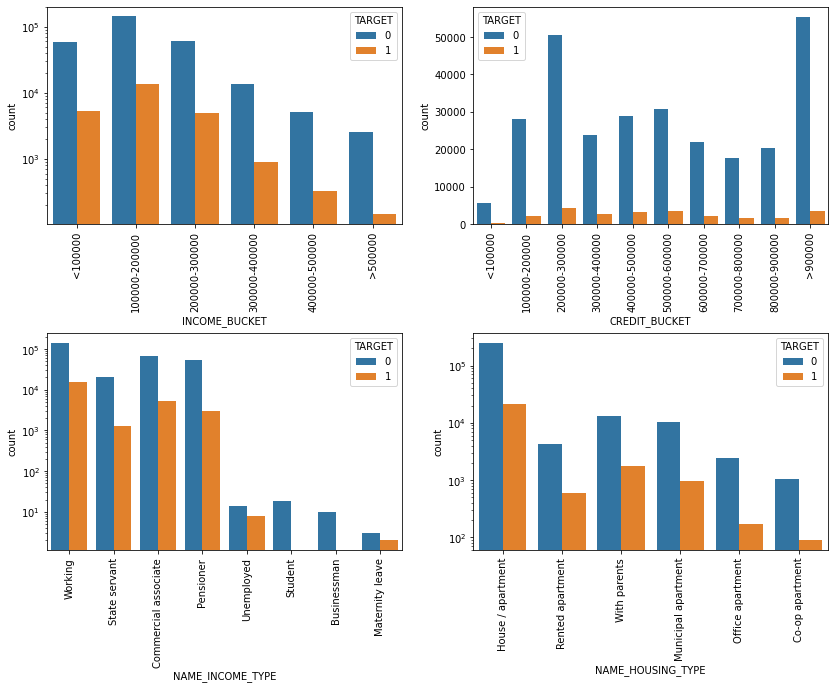

In [48]:
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sns.countplot(x="INCOME_BUCKET",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(2,2,2)
sns.countplot(x="CREDIT_BUCKET",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_INCOME_TYPE",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(2,2,4)
sns.countplot(x="NAME_HOUSING_TYPE",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

### INCOME BUCKET
1.The income bucket 100000-200000 have highest defaulters also highest non defaulters.

2.The income bucket >500000 have comparatively less defaulters which means bank will be safer with these people.

### CREDIT BUCKET
1.People who are taking loans <100000 are favourable to clear their dues. Although people are less inclined towards taking this loan bucket.

2.Maximum people have taken loans >900000. Most of them are non defaulters.

3.The 200000-300000 credit bucket also have high customers. Fairly most of them have cleared their dues. 

### INCOME TYPE
1.Working people are most inclined to taking loans. While most of them among other sections clear their dues,on the other hand the defaulters are also found most in this category.

2.State servants, working, unemployed and commercial associates are most risky people as they have higher percentage of becoming defaulter.

3.Student Pensioner and Businessman are safer categories.

4.Maternity category also have higher risk as their non_defaulter to defaulter ratio is less than others.

### HOUSING TYPE
1.People who live in house/apartment have taken maximum loans and their defaulter percentage is high. 

2.People who live in co-op apartment have significantly less defaulters.

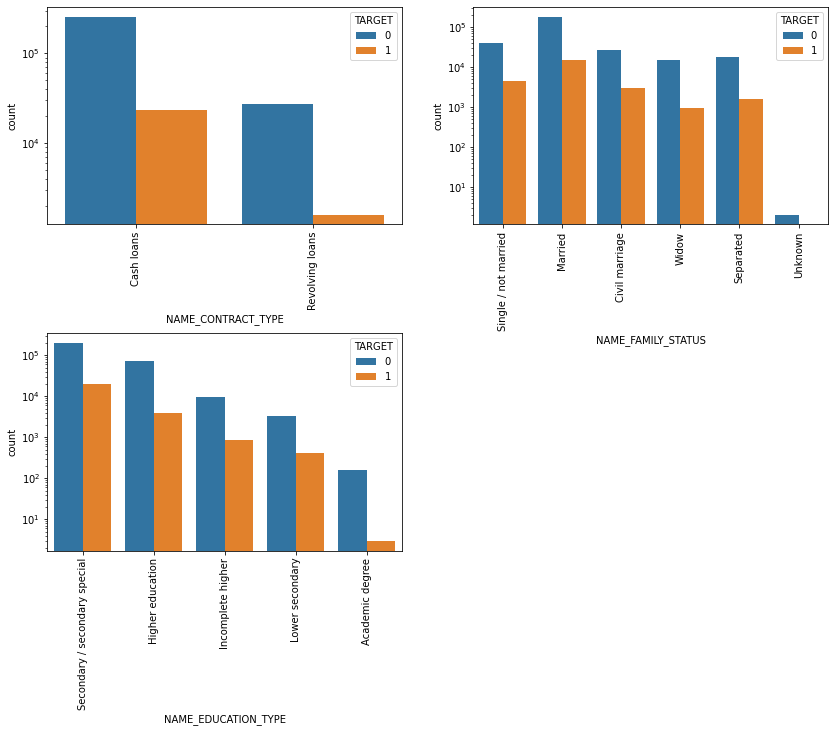

In [49]:
plt.figure(figsize=[14,10])
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=1.0)
plt.subplot(2,2,2)
sns.countplot(x="NAME_FAMILY_STATUS",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_EDUCATION_TYPE",hue="TARGET",data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

### CONTRACT TYPE
1.People who are taking revolving loans have less chances of becoming a defaulter

3.Cash loans attract most people. The defaulter percentage is maximum here.

### FAMILY STATUS
1.Unknown category have taken least loans among others and they have almost negligible defaulters.

2.Married people have taken maximum loans and the most defaulters are also found in this category
 

### EDUCATION TYPE
1.People with academic degree have taken least loan.They have least defaulters. The non defaulter to defaulter ratio is maximum.Hence this is the safest category from Bank POV.

2.Scondary/secondary special people have taken the maximum loans. The defaulter percentage is maximum in this category.

3.Except academic degree,the non defaulter to defaulter ratio for all other categories is significantly less. Bank has to be careful with these people.

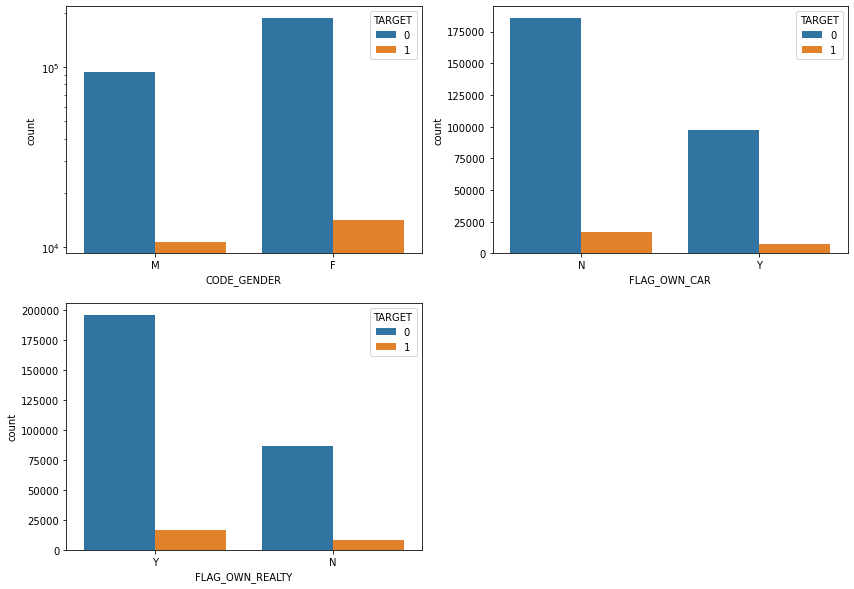

In [50]:
plt.figure(figsize=[14,10])
plt.subplot(221)
sns.countplot(x="CODE_GENDER",hue="TARGET",data=df)
#plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(222)
sns.countplot(x="FLAG_OWN_CAR",hue="TARGET",data=df)
#plt.xticks(rotation=90)
plt.subplot(223)
sns.countplot(x="FLAG_OWN_REALTY",hue="TARGET",data=df)
#plt.xticks(rotation=90)
plt.show()

### GENDER
1.Fenales have the higher count in taking loans.They have higher probability of becoming a defaulter.

2.Males have least defaulters.

3.Although the non defaulter to defaulter ratio is comparatively higher for females than males.

### HAVING OWN CAR
1.People having car have higher chances of becoming a defaulter than the ones not having it.

### HAVING OWN HOUSE/FLAT
1.People having own house/flat has lesser chances of becoming a defaulter than the ones not having it.

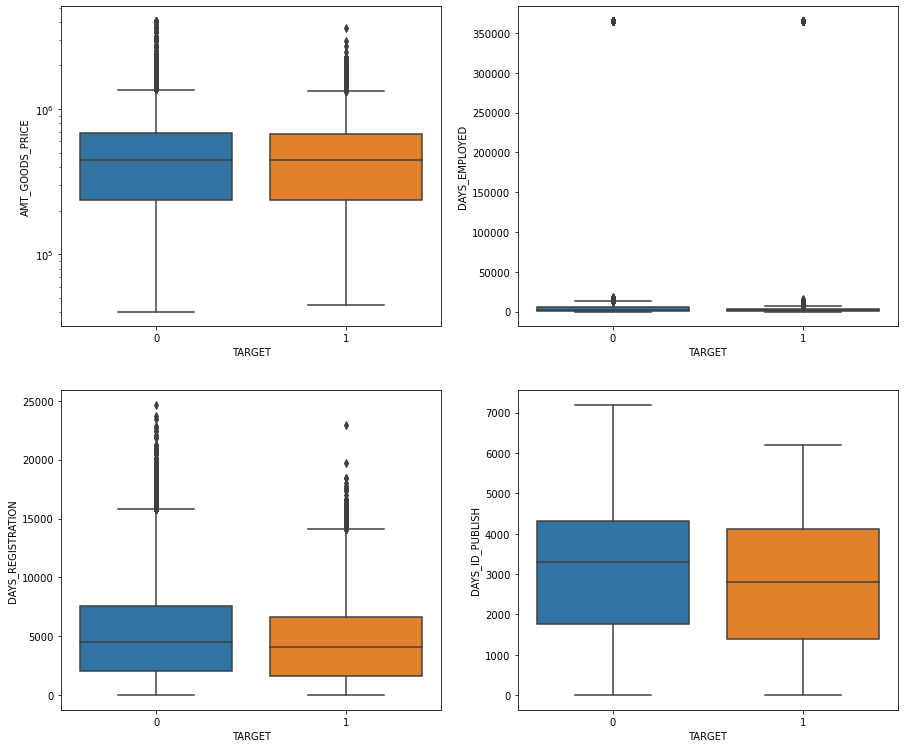

In [51]:
plt.figure(figsize=[15,20])
plt.subplot(321)
sns.boxplot(y='AMT_GOODS_PRICE',x='TARGET',data=df)
plt.yscale('log')
plt.subplot(322)
sns.boxplot(y='DAYS_EMPLOYED',x='TARGET',data=df)
plt.subplot(323)
sns.boxplot(y='DAYS_REGISTRATION',x='TARGET',data=df)
plt.subplot(324)
sns.boxplot(y='DAYS_ID_PUBLISH',x='TARGET',data=df)
plt.show()

### INFERENCES

1.In days id publish, negative skew for non defaulters and comparatively less negative skew for defaulters. We can also see people who are defaulting have recently changed their id documents.

3.In AMT GOODS PRICE the median lies at same level for both cases.The area covered is also same. The plot also shows a positive skew in both cases which interprets average price of the goods is more than its median value in both the cases. 

4.The plot for days registration shows negative skew for both defaulters and non defaulters. Maximum people who have defaulted have less registration days. A big outlier value also exist.

In [52]:
df.loc[:,'Rating3']=pd.qcut(df.loc[:,'EXT_SOURCE_3'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BUCKET,AMT_ANNUITY_Bucket,CREDIT_BUCKET,AGE,AGE_GROUP,Rating3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,<25000,400000-500000,25,"(20.0, 25.0]",Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,25000-50000,>900000,45,"(40.0, 45.0]",NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000,<25000,100000-200000,52,"(50.0, 55.0]",High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,25000-50000,300000-400000,52,"(50.0, 55.0]",NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,<25000,500000-600000,54,"(50.0, 55.0]",NaN


In [54]:
defaulters=df[df.TARGET==1]
non_defaulters=df[df.TARGET==0]

In [55]:
def plotfunc(variables):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.countplot(variables, data=non_defaulters)
    plt.title('Distribution of '+ '%s' %variables +' for Non-Defaulters', fontsize=12)
    plt.xlabel(variables)
    plt.xticks(rotation=90)
    #plt.yscale('log')
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(variables, data=defaulters)
    plt.title('Distribution of '+ '%s' %variables +' for Defaulters', fontsize=12)
    plt.xlabel(variables)
    plt.xticks(rotation=90)
    #plt.yscale('log')
    plt.ylabel('Number of cases for defaulters')
    plt.show()

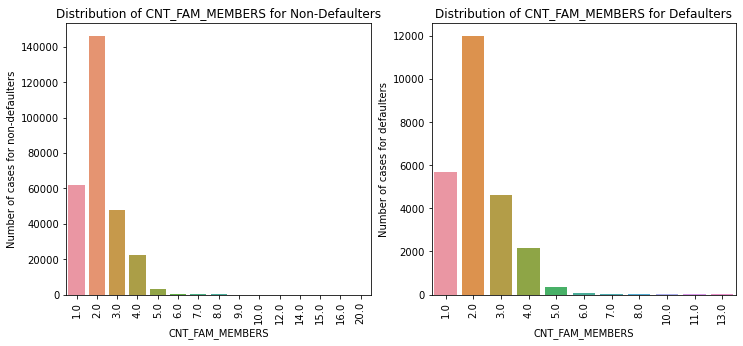

In [56]:
plotfunc('CNT_FAM_MEMBERS')

No impact as such in children count

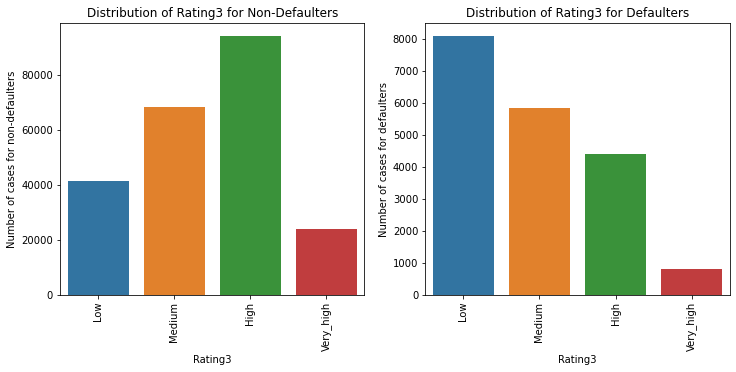

In [57]:
plotfunc('Rating3')

 People having low rating3 have defaulted

### Univariate Analysis on continuous variables

In [58]:
def plotcont(variables):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    non_defaulters[variables].plot.hist()
    plt.title('Distribution for Non-Defaulters', fontsize=12)
    plt.xlabel(variables)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    defaulters[variables].plot.hist()
    plt.title('Distribution for Defaulters', fontsize=12)
    plt.xlabel(variables)
    plt.xticks(rotation=90)
    plt.show()

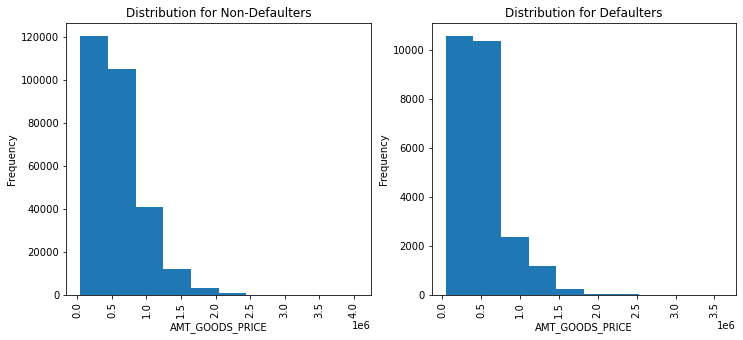

In [59]:
plotcont('AMT_GOODS_PRICE')

Defaults are higher for price of the goods for which the loan is given is lesser (between 0 to 750,000)

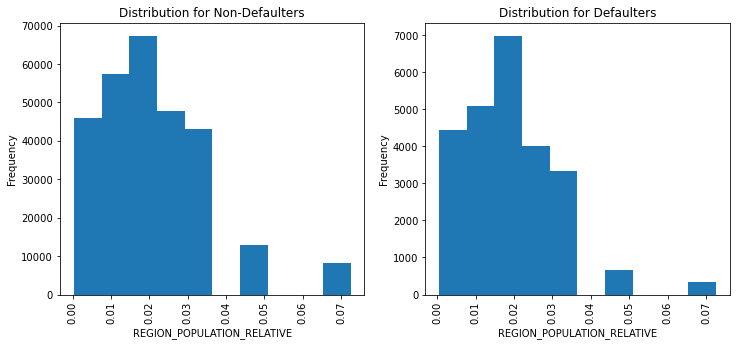

In [60]:
plotcont('REGION_POPULATION_RELATIVE')

People living in higher density area have less defaulters

### MULTIVARIATE ANALYSIS

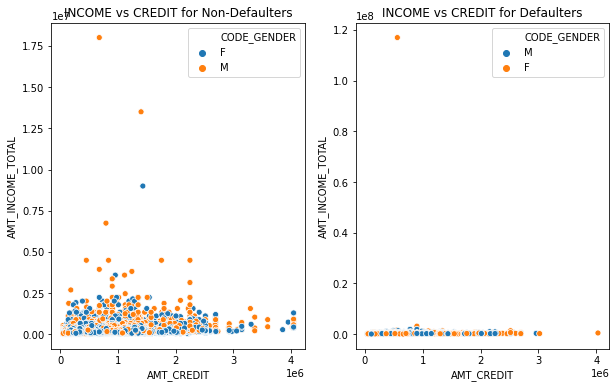

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=non_defaulters,hue=non_defaulters.CODE_GENDER)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=defaulters,hue=defaulters.CODE_GENDER)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

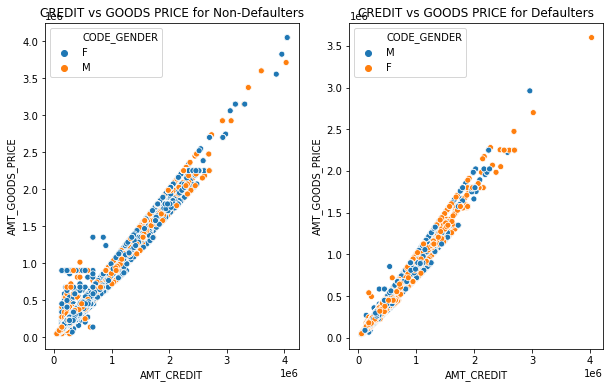

In [62]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=non_defaulters,hue=non_defaulters.CODE_GENDER)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=defaulters,hue=defaulters.CODE_GENDER)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()


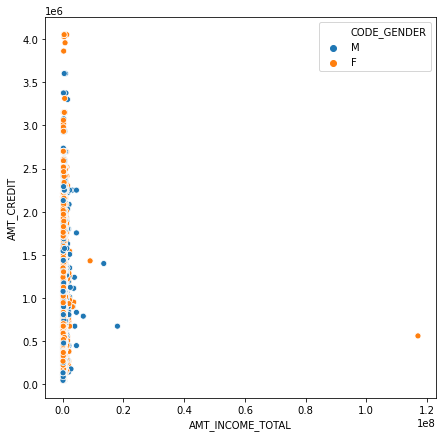

In [63]:
plt.figure(figsize=[7,7])
sns.scatterplot(df.AMT_INCOME_TOTAL,df.AMT_CREDIT,hue=df.CODE_GENDER)

1.In the same income range females have been given the maximum credit limits.

2.We can see the outlier having the maximum income value has taken ac lesser loan.

In [64]:
defaulters_organization=defaulters.groupby("ORGANIZATION_TYPE").sum()
defaulters_organization

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
ORGANIZATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Advertising,9500120,35,20,6.750000e+06,2.266637e+07,970317.0,2.047050e+07,0.822737,488661,42300,164636.0,82383,77.0,71,71,17.051087,10.062135,37.0,3.0,35.0,2.0,24656.0,0.0,0.0,0.0,16.0,8.0,48.0,1321
Agriculture,69085928,257,163,3.293034e+07,1.357764e+08,6508485.0,1.181790e+08,4.751295,3772730,716254,1143267.0,720353,624.0,566,566,94.610852,71.788230,466.0,51.0,460.0,34.0,178360.0,1.0,1.0,6.0,28.0,41.0,320.0,10214
Bank,35334499,130,68,2.282175e+07,6.775527e+07,3372723.0,6.116400e+07,2.662866,1501005,168881,506491.0,274421,288.0,276,276,54.382609,32.797624,227.0,21.0,224.0,10.0,86955.0,0.0,1.0,1.0,23.0,25.0,177.0,4048
Business Entity Type 1,133948959,487,231,8.225710e+07,2.654553e+08,12799593.0,2.322000e+08,10.756172,6711380,946032,2150515.0,1279081,1066.0,981,974,207.929294,151.687413,746.0,98.0,740.0,70.0,390622.0,4.0,2.0,8.0,122.0,113.0,855.0,18139
Business Entity Type 2,252506258,900,461,1.416556e+08,4.899718e+08,22863033.0,4.293708e+08,17.908930,12496280,2239485,3980428.0,2447922,2013.0,1929,1911,363.953439,288.198076,1428.0,183.0,1406.0,121.0,763418.0,11.0,2.0,42.0,242.0,185.0,1474.0,33771
Business Entity Type 3,1757583031,6323,3208,1.230156e+09,3.600836e+09,175168390.5,3.152932e+09,126.405692,87382958,9312325,26815550.0,16332027,14043.0,13394,13251,2628.488742,1828.730164,8921.0,1156.0,8813.0,849.0,4988106.0,32.0,29.0,182.0,1298.0,1317.0,10407.0,236109
Cleaning,8596833,29,10,3.676500e+06,1.182386e+07,634869.0,1.015056e+07,0.531745,404119,26906,115174.0,55503,56.0,66,65,9.945219,6.975458,44.0,9.0,44.0,9.0,19849.0,0.0,0.0,1.0,6.0,2.0,43.0,1091
Construction,224982674,785,355,1.467302e+08,4.517365e+08,22245912.0,3.968963e+08,14.852759,11260331,1139862,3232264.0,2109223,1698.0,1690,1675,320.854838,237.259979,1128.0,130.0,1110.0,88.0,648743.0,4.0,4.0,15.0,152.0,173.0,1349.0,30436
Culture,5526421,21,12,3.431250e+06,1.124596e+07,517347.0,1.048950e+07,0.324362,304562,55025,71258.0,48723,50.0,43,43,10.563953,5.905752,40.0,2.0,39.0,2.0,19808.0,0.0,0.0,0.0,6.0,2.0,23.0,823


In [65]:
top_10_organizations=defaulters_organization.sort_values(by="TARGET",ascending=False).head(10)
top_10_organizations

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
ORGANIZATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Business Entity Type 3,1757583031,6323,3208,1.230156e+09,3.600836e+09,175168390.5,3.152932e+09,126.405692,87382958,9312325,26815550.0,16332027,14043.0,13394,13251,2628.488742,1828.730164,8921.0,1156.0,8813.0,849.0,4988106.0,32.0,29.0,182.0,1298.0,1317.0,10407.0,236109
Self-employed,1090136511,3908,2052,6.246520e+08,2.126654e+09,105337624.5,1.852230e+09,68.898044,54409909,6341156,16235216.0,9961768,8824.0,8628,8551,1550.353283,1123.511530,6045.0,789.0,5973.0,571.0,3082012.0,24.0,22.0,89.0,608.0,838.0,6560.0,147030
XNA,825307064,2990,210,4.048068e+08,1.669085e+09,70942149.0,1.473900e+09,58.673847,64110082,1092076570,18500796.0,10961085,5088.0,6454,6395,1225.482037,1014.615793,4301.0,586.0,4242.0,431.0,2412643.0,12.0,35.0,106.0,434.0,702.0,5444.0,174019
Other,352544010,1275,647,2.039503e+08,7.046517e+08,33595681.5,6.170435e+08,23.749086,18563959,2614150,5536654.0,3404837,2838.0,2722,2696,529.938064,390.277264,1847.0,226.0,1823.0,152.0,1088391.0,12.0,7.0,33.0,255.0,264.0,2109.0,50204
Business Entity Type 2,252506258,900,461,1.416556e+08,4.899718e+08,22863033.0,4.293708e+08,17.908930,12496280,2239485,3980428.0,2447922,2013.0,1929,1911,363.953439,288.198076,1428.0,183.0,1406.0,121.0,763418.0,11.0,2.0,42.0,242.0,185.0,1474.0,33771
Construction,224982674,785,355,1.467302e+08,4.517365e+08,22245912.0,3.968963e+08,14.852759,11260331,1139862,3232264.0,2109223,1698.0,1690,1675,320.854838,237.259979,1128.0,130.0,1110.0,88.0,648743.0,4.0,4.0,15.0,152.0,173.0,1349.0,30436
Trade: type 7,203767437,740,412,1.198688e+08,4.078494e+08,20205337.5,3.585274e+08,13.590164,10355473,1169461,3127705.0,1861987,1691.0,1620,1612,284.686551,203.431174,1131.0,162.0,1120.0,118.0,579048.0,1.0,5.0,26.0,125.0,182.0,1181.0,27979
Medicine,202190590,737,385,1.071542e+08,4.135209e+08,18816349.5,3.559950e+08,13.847210,10740566,2134141,3118596.0,1934411,1693.0,1614,1598,312.718226,237.588535,1204.0,140.0,1191.0,101.0,647865.0,3.0,5.0,24.0,136.0,168.0,1332.0,29036
Government,202734209,726,381,1.112897e+08,4.150686e+08,18872244.0,3.649054e+08,13.952013,10637093,1711538,3188529.0,2033533,1644.0,1590,1579,305.948404,229.972140,1139.0,136.0,1121.0,98.0,619543.0,3.0,2.0,22.0,121.0,143.0,1216.0,28747


In [66]:
top_10_organizations=top_10_organizations.apply(lambda x:x/top_10_organizations.TARGET)
top_10_organizations

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
ORGANIZATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Business Entity Type 3,277966.634667,1.0,0.507354,194552.516053,569482.222205,27703.367152,498644.889688,0.019991,13819.857346,1472.770046,4240.953661,2582.955401,2.220939,2.118298,2.095682,0.415703,0.289219,1.410881,0.182825,1.393800,0.134272,788.882809,0.005061,0.004586,0.028784,0.205282,0.208287,1.645896,37.341294
Self-employed,278949.977226,1.0,0.525077,159839.313715,544179.749232,26954.356320,473958.586105,0.017630,13922.699335,1622.609007,4154.354145,2549.070624,2.257932,2.207779,2.188076,0.396713,0.287490,1.546827,0.201894,1.528403,0.146111,788.641760,0.006141,0.005629,0.022774,0.155578,0.214432,1.678608,37.622825
XNA,276022.429431,1.0,0.070234,135386.888629,558222.336120,23726.471237,492943.063545,0.019623,21441.498997,365243.000000,6187.557191,3665.914716,1.701672,2.158528,2.138796,0.409860,0.339336,1.438462,0.195987,1.418729,0.144147,806.904013,0.004013,0.011706,0.035452,0.145151,0.234783,1.820736,58.200334
Other,276505.105882,1.0,0.507451,159961.048235,552668.025882,26349.554118,483955.704706,0.018627,14559.967843,2050.313725,4342.473725,2670.460392,2.225882,2.134902,2.114510,0.415638,0.306100,1.448627,0.177255,1.429804,0.119216,853.640000,0.009412,0.005490,0.025882,0.200000,0.207059,1.654118,39.375686
Business Entity Type 2,280562.508889,1.0,0.512222,157395.100000,544413.065000,25403.370000,477078.690000,0.019899,13884.755556,2488.316667,4422.697778,2719.913333,2.236667,2.143333,2.123333,0.404393,0.320220,1.586667,0.203333,1.562222,0.134444,848.242222,0.012222,0.002222,0.046667,0.268889,0.205556,1.637778,37.523333
Construction,286602.132484,1.0,0.452229,186917.388535,575460.550318,28338.741401,505600.406369,0.018921,14344.370701,1452.053503,4117.533758,2686.908280,2.163057,2.152866,2.133758,0.408732,0.302242,1.436943,0.165605,1.414013,0.112102,826.424204,0.005096,0.005096,0.019108,0.193631,0.220382,1.718471,38.771975
Trade: type 7,275361.401351,1.0,0.556757,161984.870270,551147.850000,27304.510135,484496.440541,0.018365,13993.882432,1580.352703,4226.628378,2516.198649,2.285135,2.189189,2.178378,0.384712,0.274907,1.528378,0.218919,1.513514,0.159459,782.497297,0.001351,0.006757,0.035135,0.168919,0.245946,1.595946,37.809459
Medicine,274342.727273,1.0,0.522388,145392.337856,561086.755767,25531.003392,483032.564450,0.018789,14573.359566,2895.713704,4231.473541,2624.709634,2.297151,2.189959,2.168250,0.424312,0.322373,1.633650,0.189959,1.616011,0.137042,879.056988,0.004071,0.006784,0.032564,0.184532,0.227951,1.807327,39.397558
Government,279248.221763,1.0,0.524793,153291.657025,571719.774793,25994.826446,502624.450413,0.019218,14651.643251,2357.490358,4391.913223,2801.009642,2.264463,2.190083,2.174931,0.421417,0.316766,1.568871,0.187328,1.544077,0.134986,853.365014,0.004132,0.002755,0.030303,0.166667,0.196970,1.674931,39.596419


In [67]:
organizations=top_10_organizations.pivot_table(index=top_10_organizations.index,values=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
organizations

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
ORGANIZATION_TYPE,,,,
Business Entity Type 2,25403.370000,544413.065000,477078.690000,157395.100000
Business Entity Type 3,27703.367152,569482.222205,498644.889688,194552.516053
Construction,28338.741401,575460.550318,505600.406369,186917.388535
Government,25994.826446,571719.774793,502624.450413,153291.657025
Medicine,25531.003392,561086.755767,483032.564450,145392.337856
Other,26349.554118,552668.025882,483955.704706,159961.048235
School,24670.060837,543815.058935,473172.792776,137459.729087
Self-employed,26954.356320,544179.749232,473958.586105,159839.313715
Trade: type 7,27304.510135,551147.850000,484496.440541,161984.870270


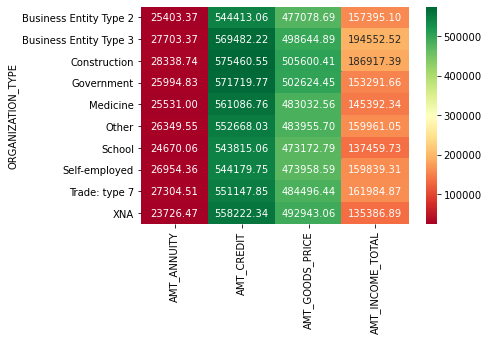

In [68]:
sns.heatmap(organizations,annot=True,cmap="RdYlGn",fmt="1.2f")
plt.show()

1.These are top 10 organization type where people who are working defaulting the most.

2.We can see that people here have went for goods with price significantly higher than their total income.They have also been given higher credit but somehow they are failing to pay the dues.

In [69]:
columns=['AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','CNT_FAM_MEMBERS','CNT_CHILDREN',
          'REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2','EXT_SOURCE_3',
         'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','DAYS_EMPLOYED','DAYS_BIRTH']

In [70]:
defaulters_co=defaulters[columns]
defaulters_correlation = defaulters_co.corr()

In [71]:
corr=defaulters_correlation.unstack()
corr.sort_values(ascending=False).drop_duplicates().head(6)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_GOODS_PRICE              AMT_CREDIT              0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN            0.885484
AMT_GOODS_PRICE              AMT_ANNUITY             0.752699
AMT_ANNUITY                  AMT_CREDIT              0.752195
dtype: float64

In [72]:
corr.sort_values(ascending=False).drop_duplicates().tail(6)

CNT_FAM_MEMBERS              DAYS_BIRTH                    -0.203267
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.248859
                             REGION_RATING_CLIENT          -0.250519
DAYS_BIRTH                   CNT_CHILDREN                  -0.259109
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.443236
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.446977
dtype: float64

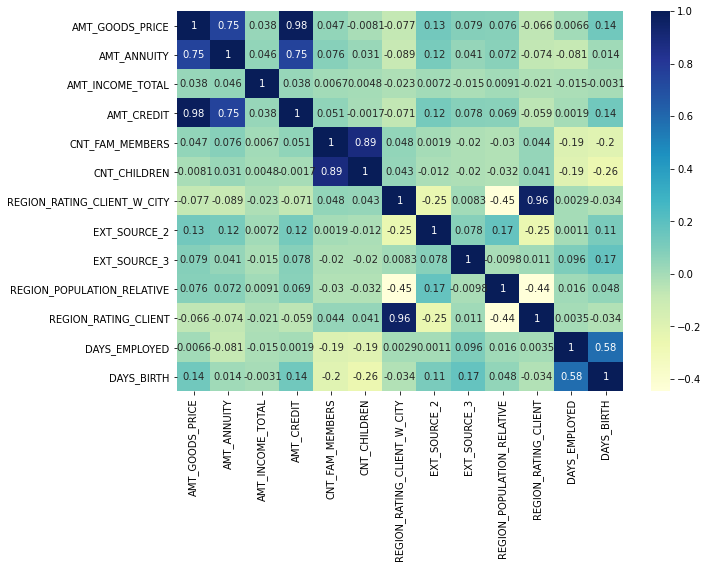

In [73]:
plt.figure(figsize=(10,7))
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

###  Top 5 Positive correlations
      1. AMT_GOODS_PRICE - AMT_CREDIT
      2. REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
      3. CNT_FAM_MEMBERS - CNT_CHILDREN
      4. AMT_GOODS_PRICE - AMT_ANNUITY
      5. AMT_ANNUITY - AMT_CREDIT

### Top 5 Negative correlations
    1.CNT_FAM_MEMBERS - DAYS_BIRTH                    
    2.EXT_SOURCE_2 - REGION_RATING_CLIENT_W_CITY   
                     REGION_RATING_CLIENT          
    3.DAYS_BIRTH - CNT_CHILDREN                  
    4.REGION_RATING_CLIENT - REGION_POPULATION_RELATIVE    
    5.REGION_RATING_CLIENT_W_CITY - REGION_POPULATION_RELATIVE 

In [74]:
non_defaulters_co=non_defaulters[columns]
non_defaulters_correlation = non_defaulters_co.corr()

In [75]:
corr_n=non_defaulters_correlation .unstack()
corr_n.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_CREDIT                   AMT_GOODS_PRICE         0.987250
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN            0.878571
AMT_ANNUITY                  AMT_GOODS_PRICE         0.776686
AMT_CREDIT                   AMT_ANNUITY             0.771309
DAYS_BIRTH                   DAYS_EMPLOYED           0.626114
AMT_ANNUITY                  AMT_INCOME_TOTAL        0.418953
AMT_INCOME_TOTAL             AMT_GOODS_PRICE         0.349462
                             AMT_CREDIT              0.342799
dtype: float64

In [76]:
corr_n=non_defaulters_correlation .unstack()
corr_n.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_INCOME_TOTAL             REGION_RATING_CLIENT          -0.186573
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL              -0.200466
CNT_FAM_MEMBERS              DAYS_EMPLOYED                 -0.238301
CNT_CHILDREN                 DAYS_EMPLOYED                 -0.245174
DAYS_BIRTH                   CNT_FAM_MEMBERS               -0.285825
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.286337
                             REGION_RATING_CLIENT          -0.291624
CNT_CHILDREN                 DAYS_BIRTH                    -0.336966
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.537301
                             REGION_RATING_CLIENT          -0.539005
dtype: float64

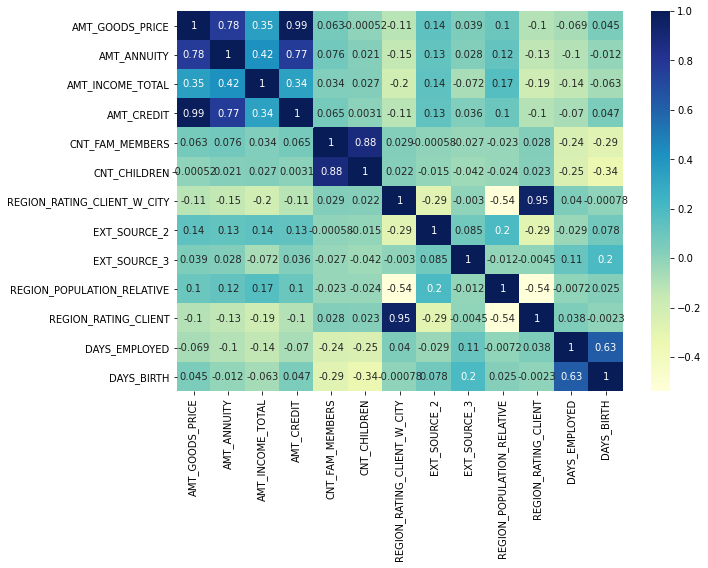

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(non_defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

### Top 5 Positive corelations
    1.AMT_CREDIT - AMT_GOODS_PRICE 
    2.REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT    
    3.CNT_FAM_MEMBERS  - CNT_CHILDREN           
    4.AMT_ANNUITY - AMT_GOODS_PRICE        
    5.AMT_CREDIT - AMT_ANNUITY  

### Checking structure of previous application data

In [78]:
Bank_PD.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
Bank_PD.shape

(1670214, 37)

In [80]:
Bank_PD.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [81]:
Bank_PD.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [82]:
Bank_PD.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [83]:
Bank_PD.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

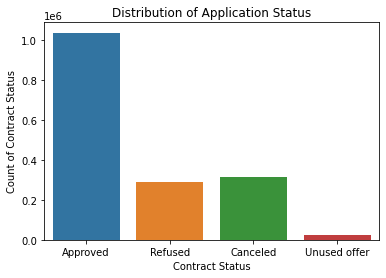

In [84]:
sns.countplot(Bank_PD.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Application Status")
plt.show()

Maximum people had been approved.

In [85]:
50/100*len(Bank_PD)

835107.0

In [86]:
PD_null_cols=Bank_PD.isnull().sum()
PD_null_cols

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [87]:
PD_null_col=list(PD_null_cols[PD_null_cols>835107.0].index)
len(PD_null_col)

4

In [88]:
df1 = Bank_PD.drop(columns=PD_null_col)
df1.shape

(1670214, 33)

In [89]:
(df1.isnull().sum()/len(df1)*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [91]:
approved=df1[df1.NAME_CONTRACT_STATUS=='Approved']
refused=df1[df1.NAME_CONTRACT_STATUS=='Refused']
canceled=df1[df1.NAME_CONTRACT_STATUS=='Canceled']
unused=df1[df1.NAME_CONTRACT_STATUS=='Unused Offer']

In [92]:
approved_percentage=(len(approved)*100)/len(df1)
refused_percentage=(len(refused)*100)/len(df1)
canceled_percentage=(len(canceled)*100)/len(df1)
unused_percentage=(len(unused)*100)/len(df1)

print("The Percentage of people whose loans have been Approved is:",round(approved_percentage,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(refused_percentage,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(canceled_percentage,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(unused_percentage,2),"%")

The Percentage of people whose loans have been Approved is: 62.07 %
The Percentage of people whose loans have been Refused is: 17.4 %
The Percentage of people whose loans have been Canceled is: 18.94 %
The Percentage of people whose loans have been Unused is: 0.0 %


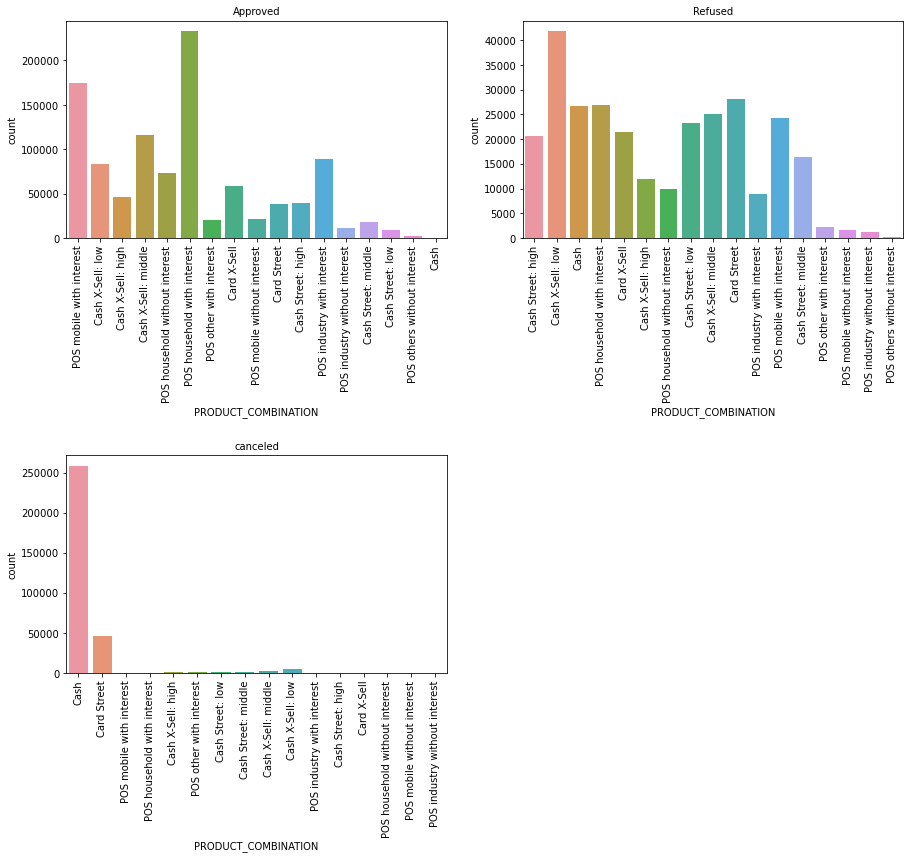

In [93]:
plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
sns.countplot(x="PRODUCT_COMBINATION",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="PRODUCT_COMBINATION",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="PRODUCT_COMBINATION",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)


1.We observe most number of loans were approved for POS household with interest.

2.Most number of refused loans were of Cash X-Sell

3.Most Canceled loans were Cash loans

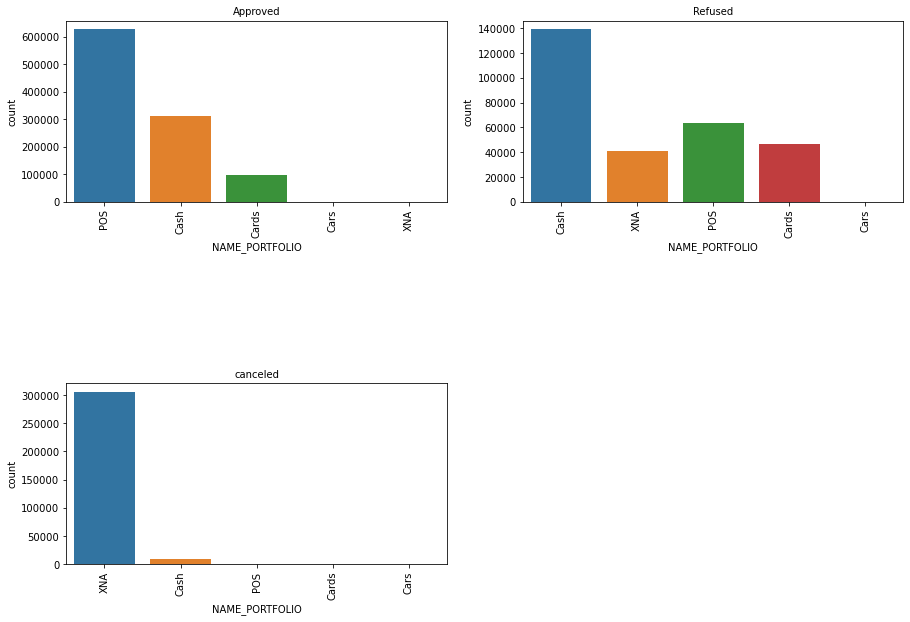

In [94]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_PORTFOLIO",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_PORTFOLIO",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_PORTFOLIO",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were POS


2.Most refused loans were Cash

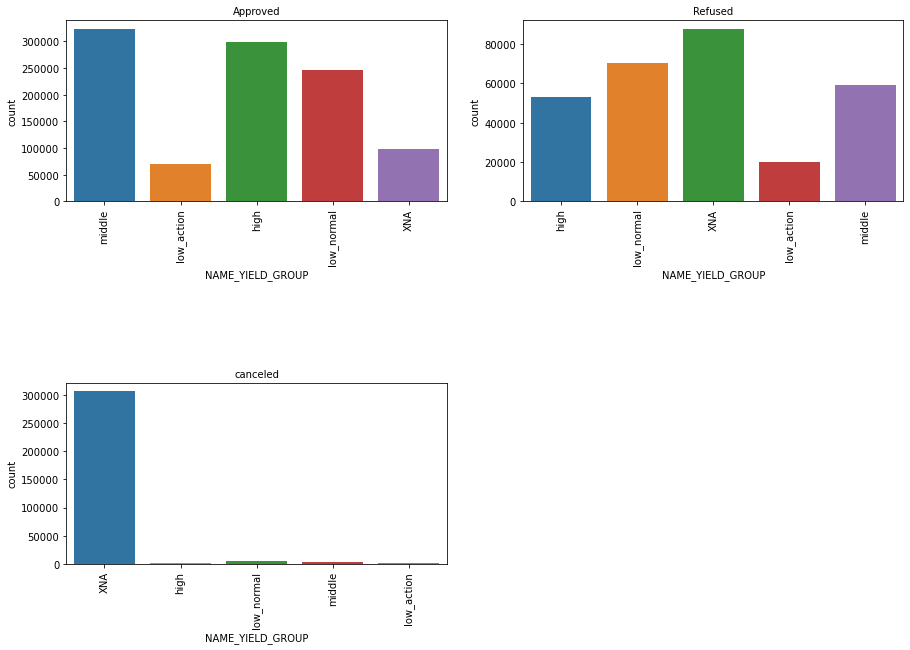

In [95]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_YIELD_GROUP",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_YIELD_GROUP",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_YIELD_GROUP",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were from Middle Yield Goup


2.Most refused loans were from Yield Goups Not specified

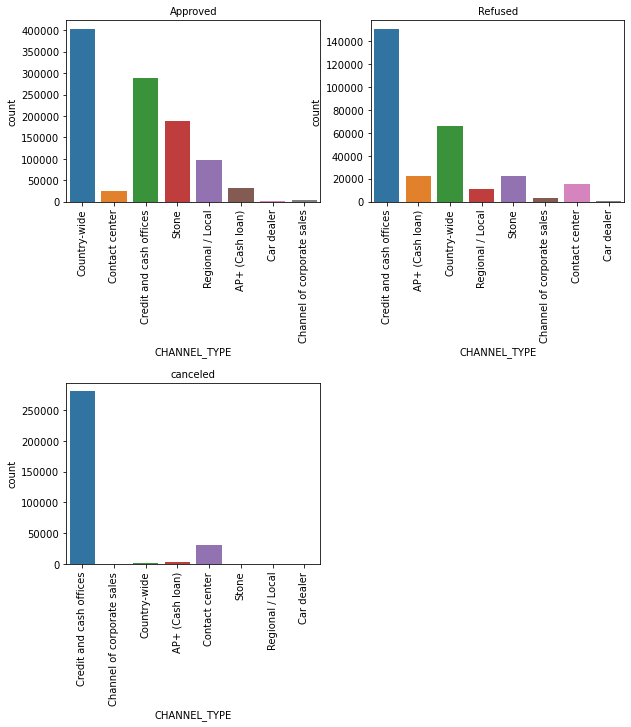

In [96]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
sns.countplot(x="CHANNEL_TYPE",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="CHANNEL_TYPE",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="CHANNEL_TYPE",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were from  Country-wide Channel

2.Most refused loans were from  Credit and Cash Offices Channel

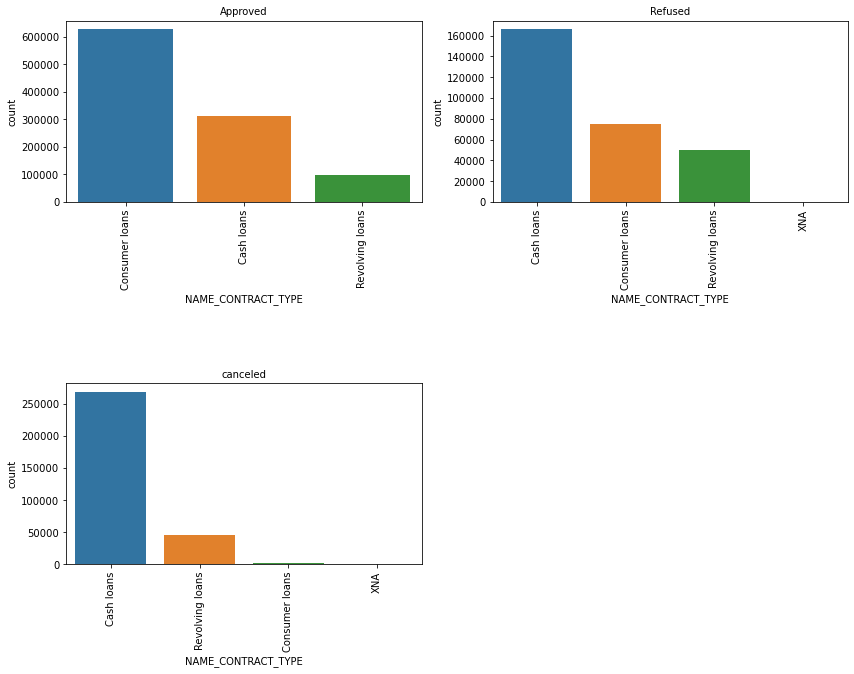

In [97]:
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_CONTRACT_TYPE",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_CONTRACT_TYPE",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1. Most approved loans from consumer loans.
2. Most refused loans from cash loans

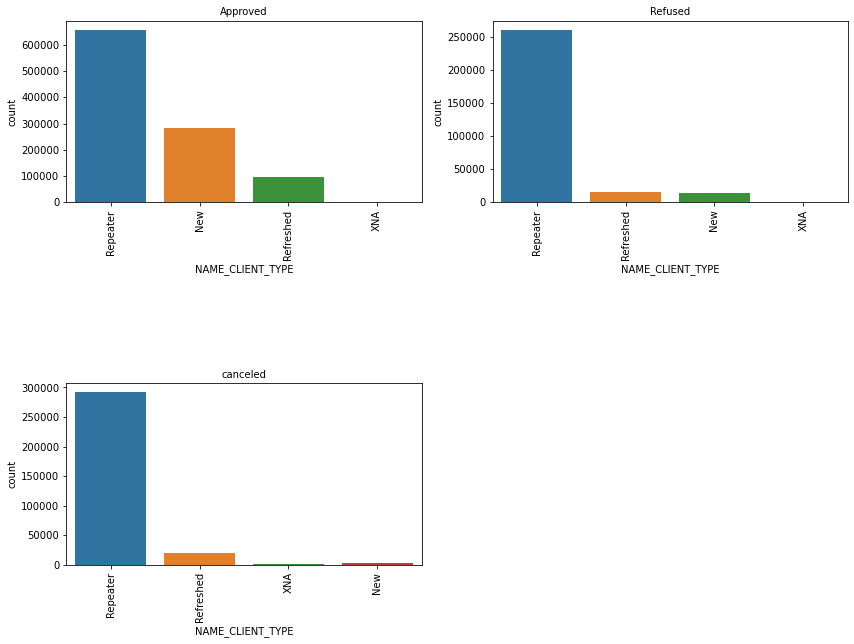

In [98]:
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_CLIENT_TYPE",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_CLIENT_TYPE",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_CLIENT_TYPE",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Repeating client types have the maximum number.

2.Lot of new clients have been approved.

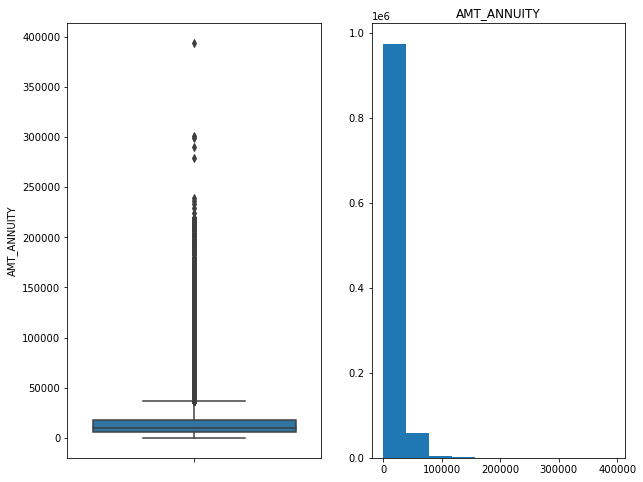

In [99]:
plt.subplots(figsize = (10, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

1.Negative skew in the box plot. Mean is less than median value

2.Maximum approved annuity lies less than 50000 value.

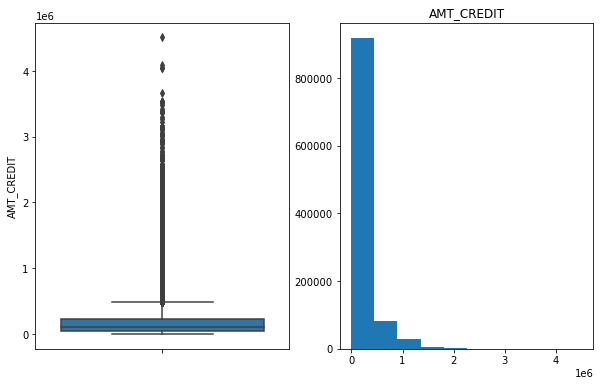

In [100]:
plt.subplots(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

1.Negative skew in the box plot. Mean is less than median value

2.Maximun Approved Amt_credit lies less than 500000.


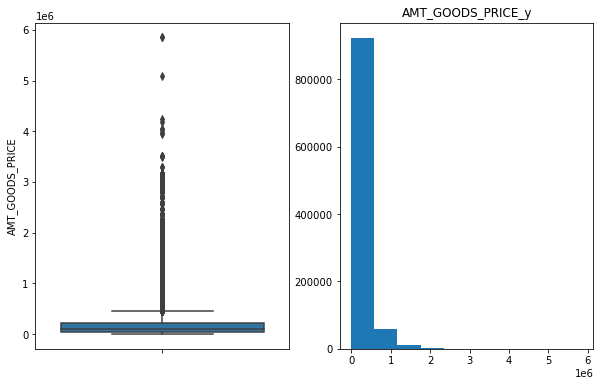

In [101]:
plt.subplots(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE_y')
plt.show()

1.Negative skew in the box plot. Mean is less than median value

2.Maximun Approved Amt_Good_Price lies less than 500000.

In [102]:
Resultant_data = pd.merge(df, df1,on=['SK_ID_CURR'],suffixes=("_curr","_prev"))

In [103]:
Resultant_data.shape

(1413701, 77)

In [104]:
Resultant_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_curr      1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_curr              1413701 non-null  float64 
 9   AMT_ANNUITY_curr             1413608 non-null  float64 
 10  AMT_GOODS_PRICE_curr         1412493 non-null  float64 
 11  NAME_TYPE_SUITE_curr         1410175 non-null  object  
 12  NAME_INCOME_TYPE            

In [105]:
approved=Resultant_data[Resultant_data.NAME_CONTRACT_STATUS=='Approved']
refused=Resultant_data[Resultant_data.NAME_CONTRACT_STATUS=='Refused']
canceled=Resultant_data[Resultant_data.NAME_CONTRACT_STATUS=='Canceled']
unused=Resultant_data[Resultant_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [106]:
approved.TARGET.value_counts(normalize=True)

0    0.924113
1    0.075887
Name: TARGET, dtype: float64

In [107]:
refused.TARGET.value_counts(normalize=True)

0    0.880036
1    0.119964
Name: TARGET, dtype: float64

In [108]:
canceled.TARGET.value_counts(normalize=True)

0    0.908264
1    0.091736
Name: TARGET, dtype: float64

Loans which were previously refused or cancelled have a higher default rate

In [109]:
approved_percentage=(len(approved)*100)/len(df1)
refused_percentage=(len(refused)*100)/len(df1)
canceled_percentage=(len(canceled)*100)/len(df1)
unused_percentage=(len(unused)*100)/len(df1)

print("The Percentage of people whose loans have been Approved is:",round(approved_percentage,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(refused_percentage,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(canceled_percentage,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(unused_percentage,2),"%")

The Percentage of people whose loans have been Approved is: 53.05 %
The Percentage of people whose loans have been Refused is: 14.69 %
The Percentage of people whose loans have been Canceled is: 15.53 %
The Percentage of people whose loans have been Unused is: 0.0 %


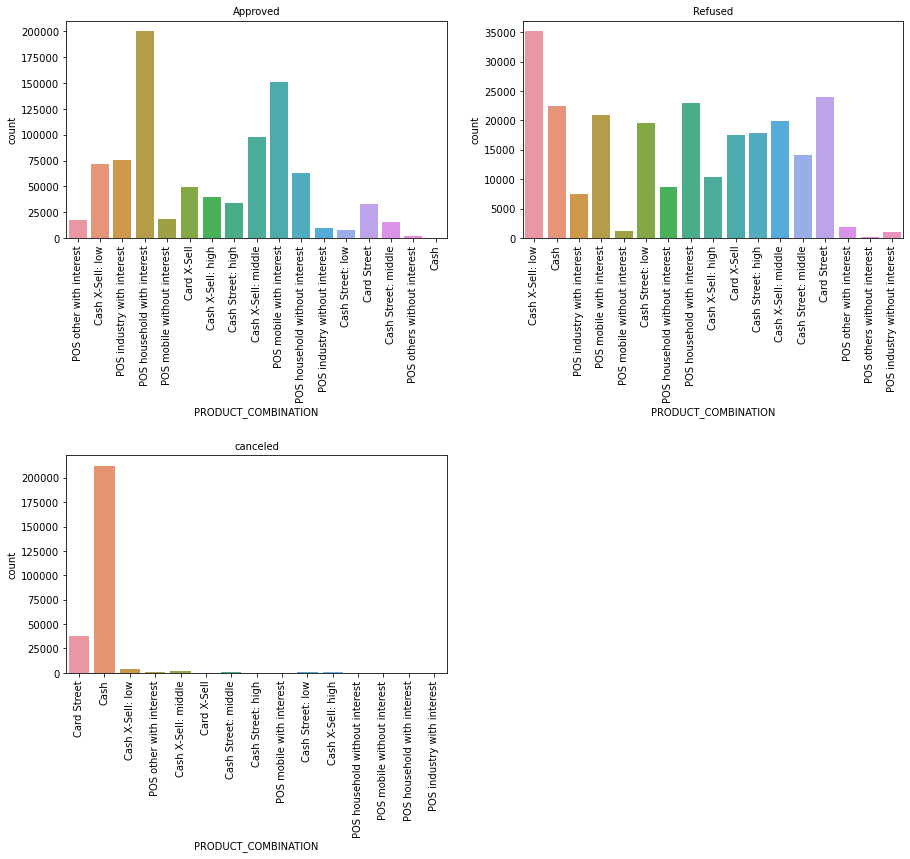

In [110]:
plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
sns.countplot(x="PRODUCT_COMBINATION",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="PRODUCT_COMBINATION",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="PRODUCT_COMBINATION",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.We observe most number of loans were approved for POS household with interest.

2.Most number of refused loans were of Cash X-Sell

3.Most Canceled loans were Cash loans

In [111]:
approved.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_curr,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,AMT_ANNUITY_curr,AMT_GOODS_PRICE_curr,NAME_TYPE_SUITE_curr,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BUCKET,AMT_ANNUITY_Bucket,CREDIT_BUCKET,AGE,AGE_GROUP,Rating3,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_prev,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,<25000,400000-500000,25,"(20.0, 25.0]",Low,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,25000-50000,>900000,45,"(40.0, 45.0]",NaN,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,25000-50000,>900000,45,"(40.0, 45.0]",NaN,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,25000-50000,>900000,45,"(40.0, 45.0]",NaN,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000,<25000,10

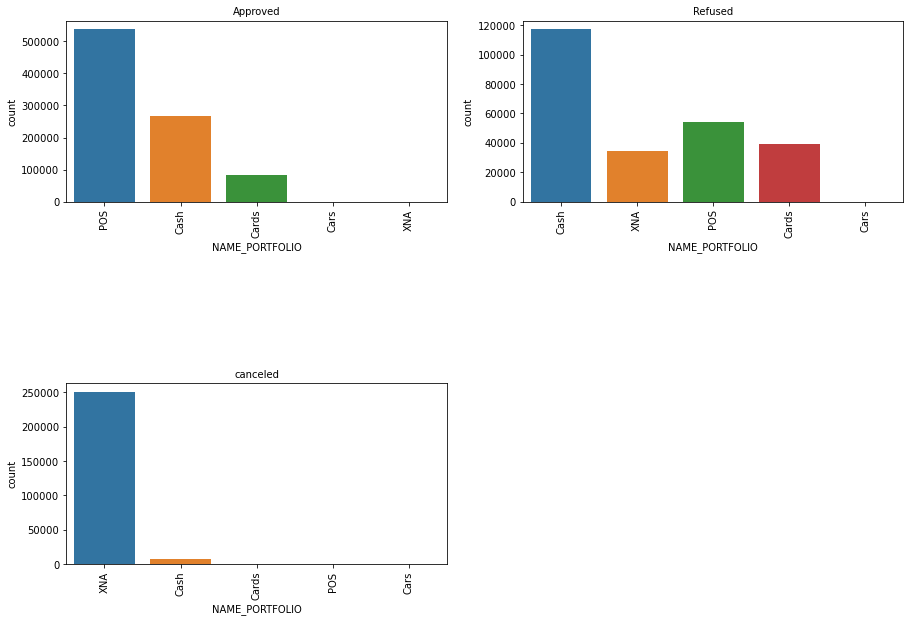

In [112]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_PORTFOLIO",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_PORTFOLIO",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_PORTFOLIO",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were POS

2.Most refused loans were Cash

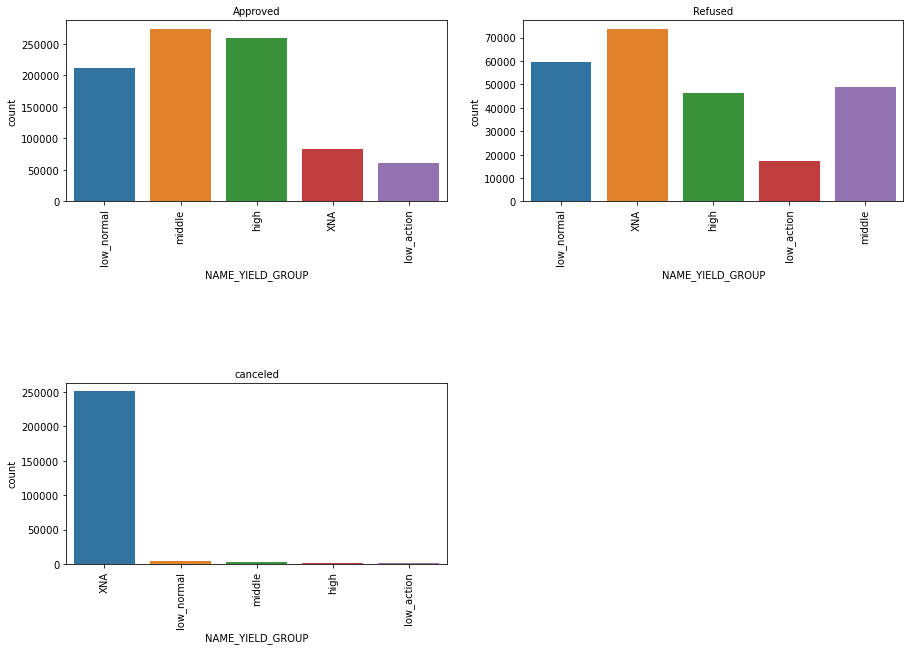

In [113]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_YIELD_GROUP",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_YIELD_GROUP",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_YIELD_GROUP",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were from Middle Yield Goup

2.Most refused loans were from Yield Goups Not specified

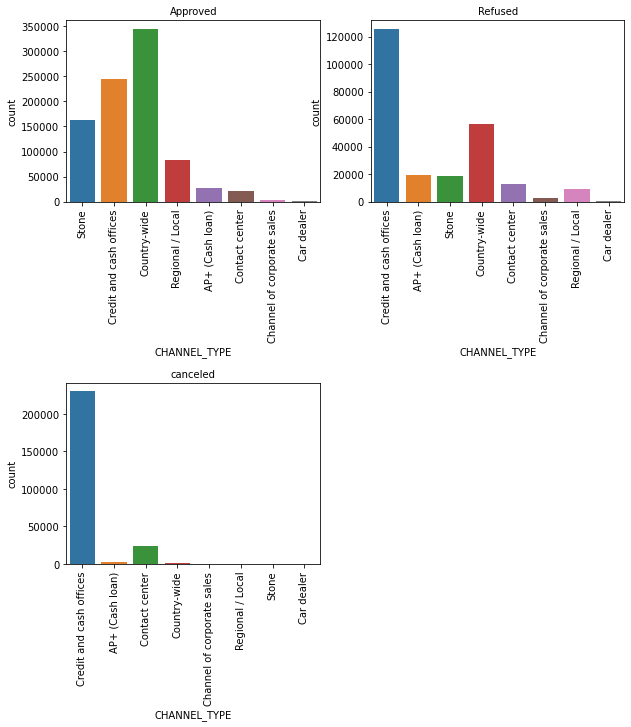

In [114]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
sns.countplot(x="CHANNEL_TYPE",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="CHANNEL_TYPE",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="CHANNEL_TYPE",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1.Most approved loans were from Country-wide Channel

2.Most refused loans were from Credit and Cash Offices Channel


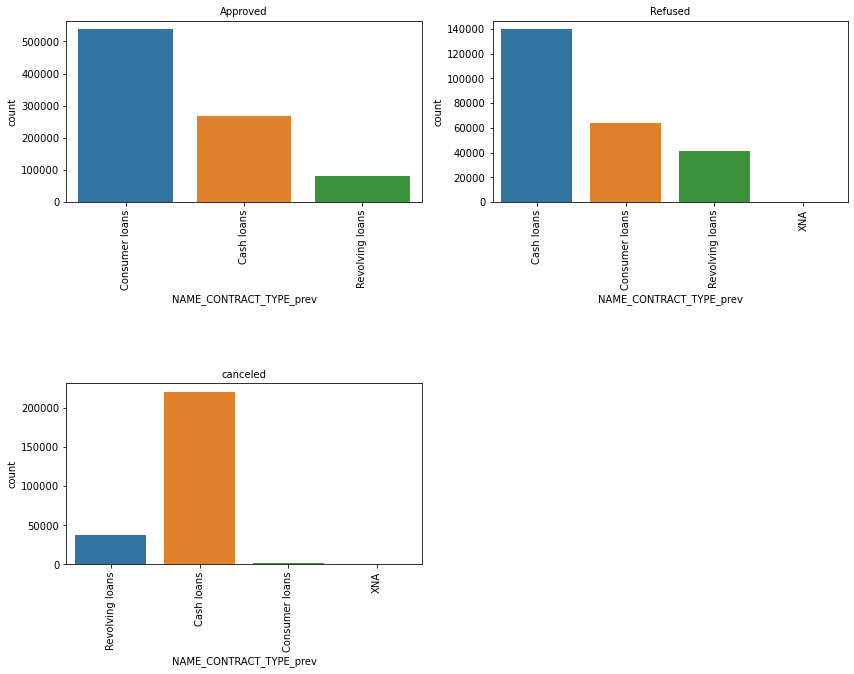

In [115]:
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE_prev",data=approved)
plt.title("Approved",size=10)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x="NAME_CONTRACT_TYPE_prev",data=refused)
plt.title("Refused",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,3)
sns.countplot(x="NAME_CONTRACT_TYPE_prev",data=canceled)
plt.title("canceled",size=10)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)

1. Most approved loans from consumer loans.
2. Most refused loans from cash loans

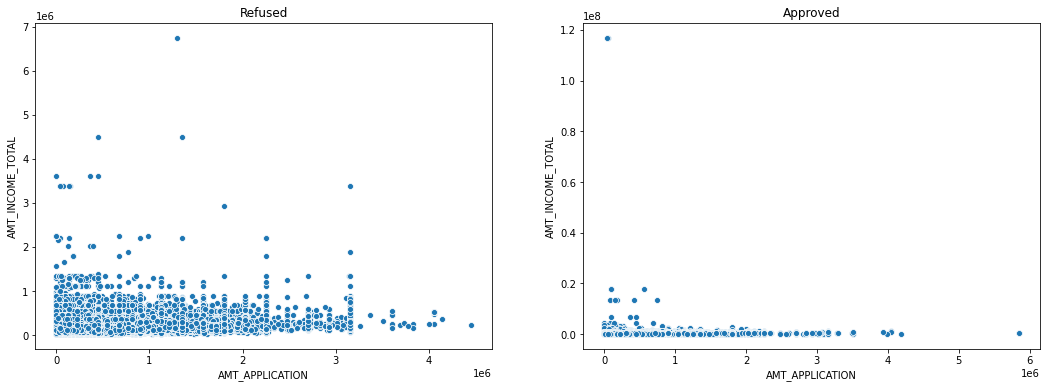

In [116]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()

Loan request higher than 200K had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 150K.

In [117]:
res=pd.pivot_table(data=Resultant_data, index="PRODUCT_COMBINATION", columns="AGE_GROUP", values="AMT_CREDIT_prev",aggfunc=["count"])
res

count                                                                                                                     
AGE_GROUP                      (20.0, 25.0] (25.0, 30.0] (30.0, 35.0] (35.0, 40.0] (40.0, 45.0] (45.0, 50.0] (50.0, 55.0] (55.0, 60.0] (60.0, 65.0] (65.0, 70.0]
PRODUCT_COMBINATION                                                                                                                                             
Card Street                            4983        13739        13820        14439        12730        10997        10453         8149         4956          327
Card X-Sell                            1851         7255         8728        10229         9718         8273         8776         8190         3745            9
Cash                                   6922        22471        25346        31235        30534        27542        29569        30921        25081         5480
Cash Street: high                       573         5436         6558         6723         6302         6070         6617         6471         5518         1431
Cash Street: low                       1241         3843         4010         4425         4084         3359         3425         2649         1357          200
Cash Street: middle                     480         3286         3631         4122         4053         3675         3819         3413         2766          689
Cash X-Sell: high                      1769         8055         8730         8111         6580         5253         5124         3532         2940          708
Cash X-Sell: low                       1175         4314         6331        11485        13396        13480        15641        21716        19812         3249
Cash X-Sell: middle                    1318         6602         9286        14625        16411        14954        16176        18342        17338         4984
POS household with interest           13026        30013        32018        33765        29590        23393        22731        21450        16633         3845
POS household without interest         3637         9253         9902        10363         9714         7970         7543         6820         5163         1154
POS industry with interest             2922         8300        10113        11074        10272         9478        10527        10790         8200         1831
POS industry without interest           227          950         1222         1510         1367         1303         1334         1414         1061          233
POS mobile with interest              12559        29701        29911        32026        28228        20064        15792        12293         8596         1677
POS mobile without interest            2323         3674         3315         3307         2666         1759         1247          911          585          103
POS other with interest                1312         2721         2656         2656         2353         2060         2161         2248         1731          411
POS others without interest             131          252          240          243          265          219          226          262          196           61

## Correlation

In [118]:
approved_columns=['AMT_GOODS_PRICE_prev', 'AMT_ANNUITY_prev', 'CNT_PAYMENT', 'AMT_CREDIT_prev', 'AMT_APPLICATION']
approved_number=approved[approved_columns]

In [119]:
approved_correlation = approved_number.corr()

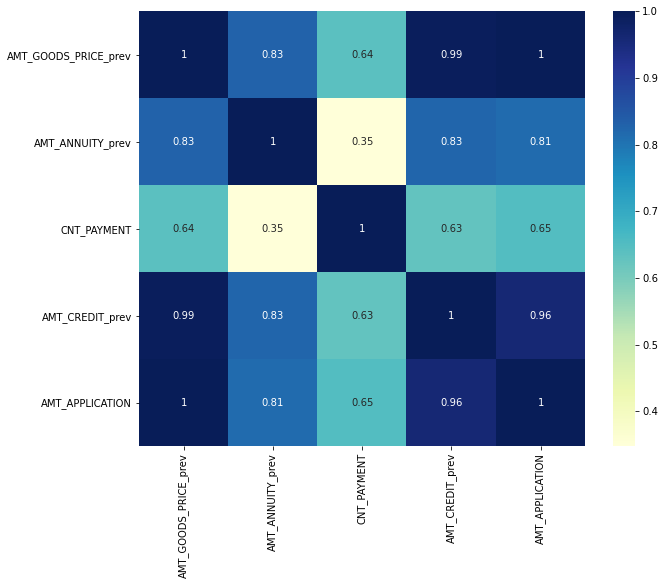

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [121]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION       AMT_APPLICATION         1.000000
AMT_GOODS_PRICE_prev  AMT_CREDIT_prev         0.993331
AMT_APPLICATION       AMT_CREDIT_prev         0.961757
AMT_ANNUITY_prev      AMT_GOODS_PRICE_prev    0.831252
AMT_CREDIT_prev       AMT_ANNUITY_prev        0.826549
AMT_APPLICATION       AMT_ANNUITY_prev        0.814540
CNT_PAYMENT           AMT_APPLICATION         0.650024
                      AMT_GOODS_PRICE_prev    0.640056
                      AMT_CREDIT_prev         0.629725
                      AMT_ANNUITY_prev        0.348058
dtype: float64

In [122]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_APPLICATION       AMT_APPLICATION         1.000000
AMT_GOODS_PRICE_prev  AMT_CREDIT_prev         0.993331
AMT_APPLICATION       AMT_CREDIT_prev         0.961757
AMT_ANNUITY_prev      AMT_GOODS_PRICE_prev    0.831252
AMT_CREDIT_prev       AMT_ANNUITY_prev        0.826549
AMT_APPLICATION       AMT_ANNUITY_prev        0.814540
CNT_PAYMENT           AMT_APPLICATION         0.650024
                      AMT_GOODS_PRICE_prev    0.640056
                      AMT_CREDIT_prev         0.629725
                      AMT_ANNUITY_prev        0.348058
dtype: float64

In [123]:
Refused_columns=['AMT_GOODS_PRICE_prev', 'AMT_ANNUITY_prev', 'CNT_PAYMENT', 'AMT_CREDIT_prev', 'AMT_APPLICATION']
Refused_number=refused[Refused_columns]

In [124]:
Refused_correlation = Refused_number.corr()

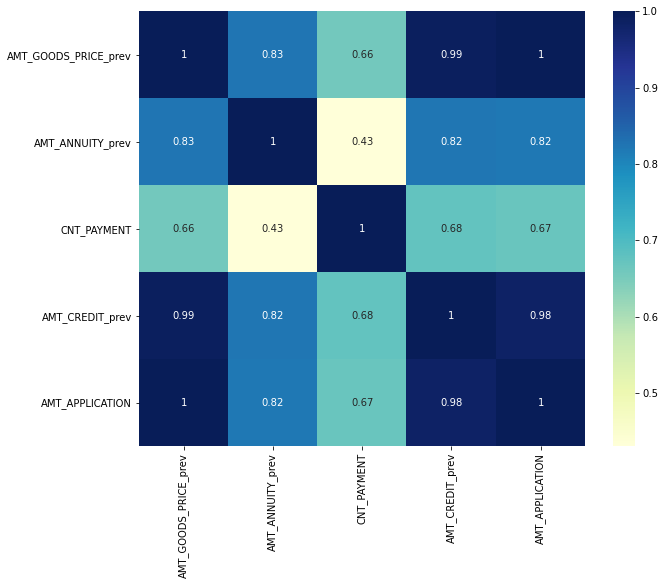

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(Refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [126]:
c0=Refused_correlation.unstack()
c0.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION       AMT_APPLICATION         1.000000
AMT_GOODS_PRICE_prev  AMT_APPLICATION         0.999666
AMT_CREDIT_prev       AMT_GOODS_PRICE_prev    0.991842
AMT_APPLICATION       AMT_CREDIT_prev         0.983684
AMT_ANNUITY_prev      AMT_GOODS_PRICE_prev    0.825296
                      AMT_CREDIT_prev         0.823054
AMT_APPLICATION       AMT_ANNUITY_prev        0.820451
AMT_CREDIT_prev       CNT_PAYMENT             0.677202
AMT_APPLICATION       CNT_PAYMENT             0.670795
AMT_GOODS_PRICE_prev  CNT_PAYMENT             0.658754
dtype: float64

In [127]:
c0.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_GOODS_PRICE_prev  AMT_APPLICATION         0.999666
AMT_CREDIT_prev       AMT_GOODS_PRICE_prev    0.991842
AMT_APPLICATION       AMT_CREDIT_prev         0.983684
AMT_ANNUITY_prev      AMT_GOODS_PRICE_prev    0.825296
                      AMT_CREDIT_prev         0.823054
AMT_APPLICATION       AMT_ANNUITY_prev        0.820451
AMT_CREDIT_prev       CNT_PAYMENT             0.677202
AMT_APPLICATION       CNT_PAYMENT             0.670795
AMT_GOODS_PRICE_prev  CNT_PAYMENT             0.658754
AMT_ANNUITY_prev      CNT_PAYMENT             0.430827
dtype: float64

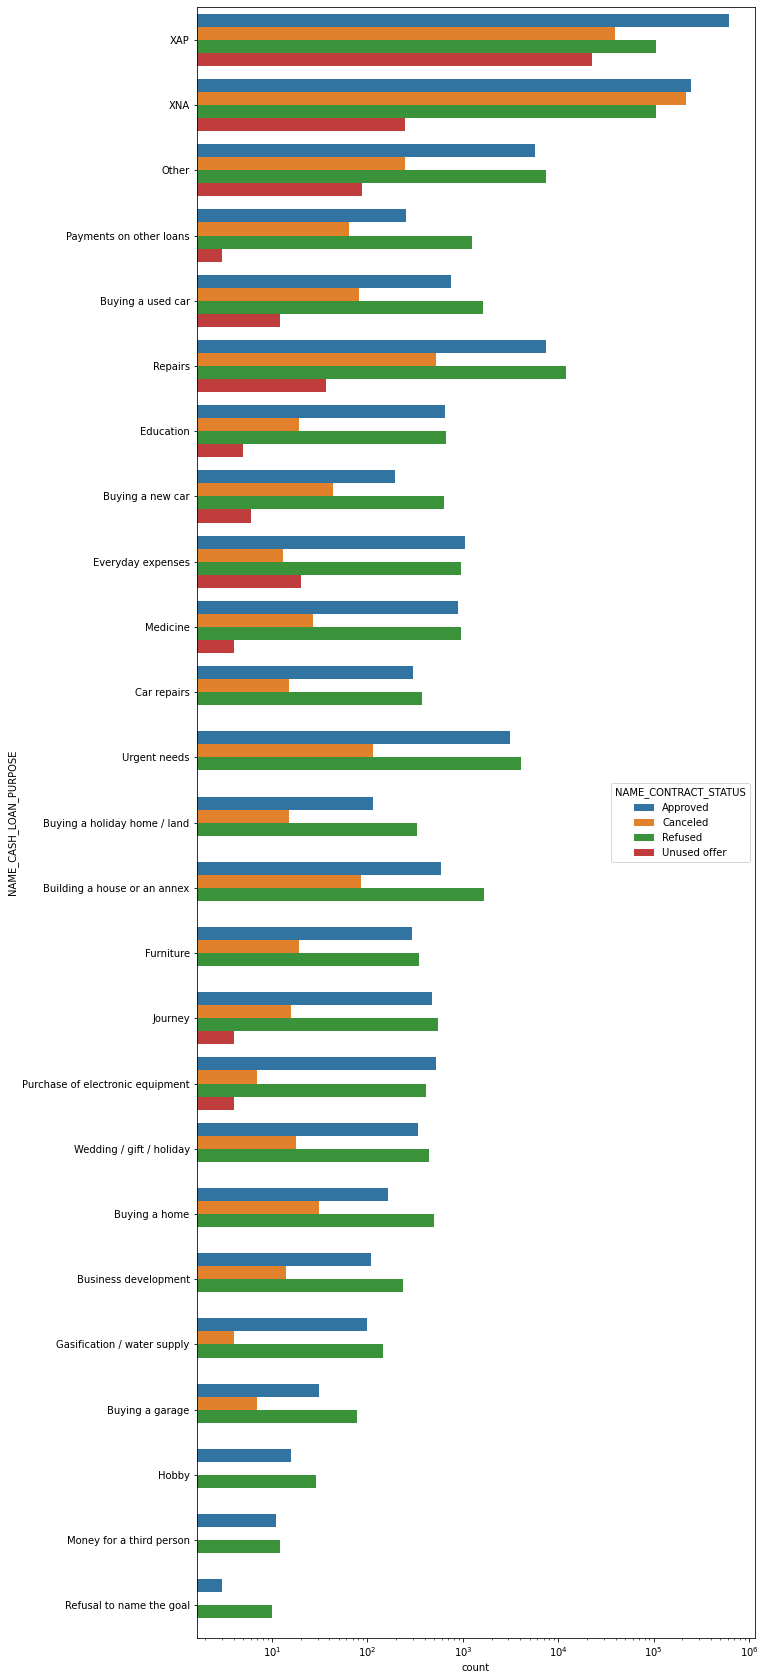

In [128]:
plt.figure(figsize=[10,30])
sns.countplot(y=Resultant_data.NAME_CASH_LOAN_PURPOSE,hue=Resultant_data.NAME_CONTRACT_STATUS)
plt.xscale('log')

1.Most rejections were in the repairs section.

2.Education has equal approve and reject.

3.Buying new car,new land and garage has more rejections than approval.

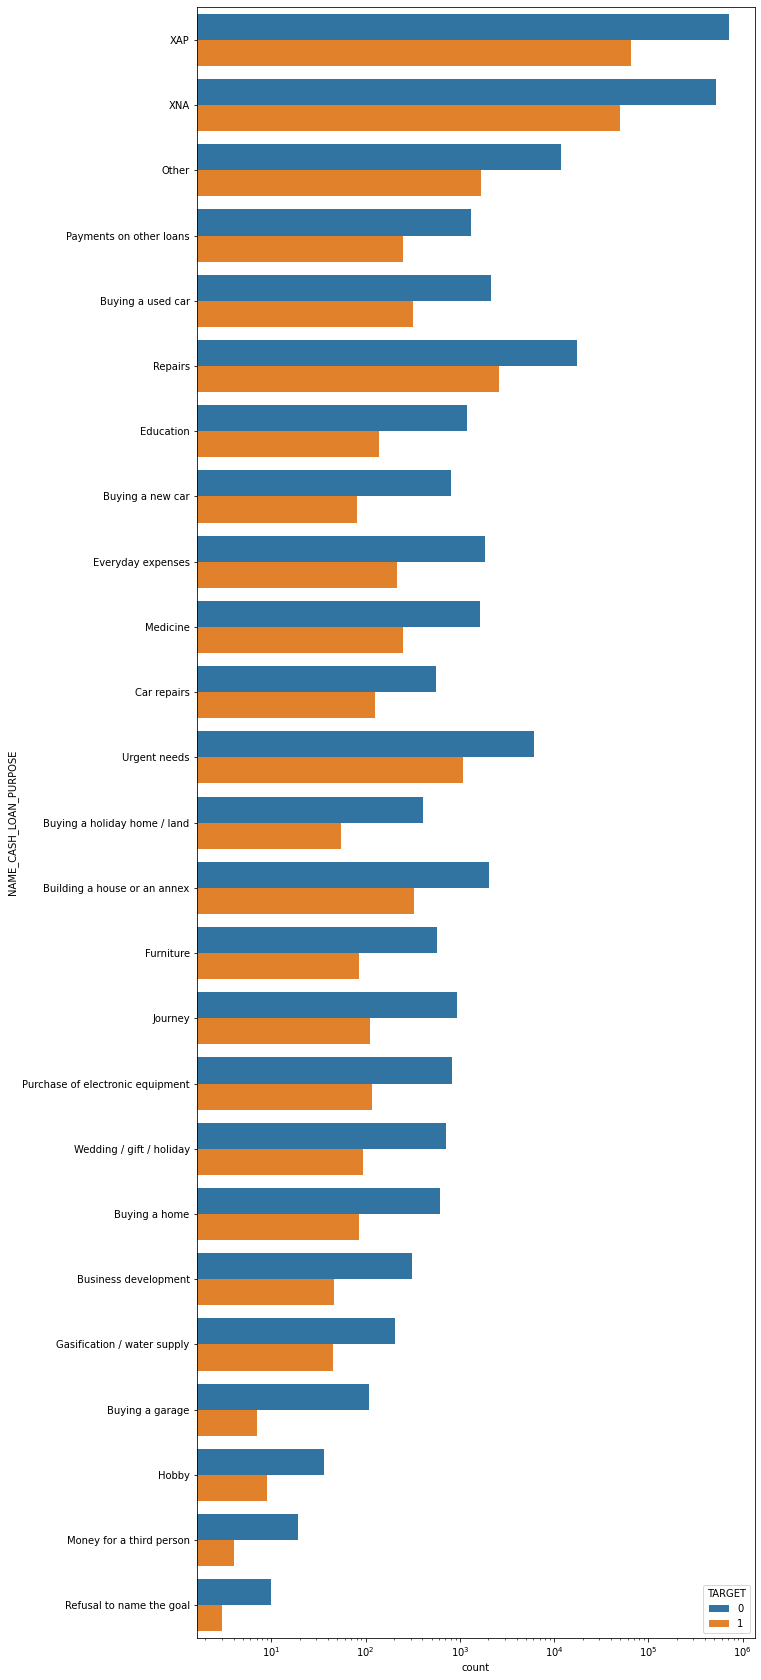

In [129]:
plt.figure(figsize=[10,30])
sns.countplot(y=Resultant_data.NAME_CASH_LOAN_PURPOSE,hue=Resultant_data.TARGET)
plt.xscale('log')

1.Buying garage,business development,buying new car,buying land and education have lesser risks.

2.Bank should avoid repairs section.They are more prone to default.

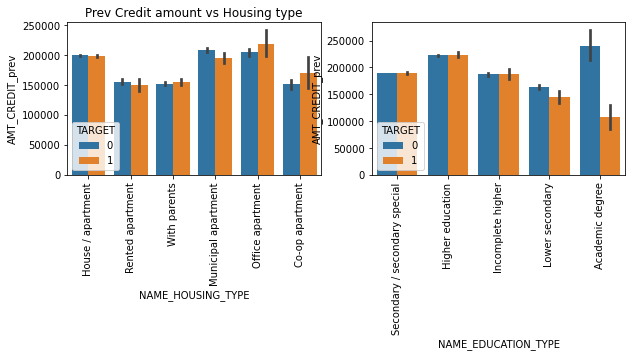

In [130]:
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.xticks(rotation=90)
sns.barplot(data =Resultant_data, y='AMT_CREDIT_prev',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.subplots_adjust(hspace=0.5)
plt.subplot(222)
plt.xticks(rotation=90)
sns.barplot(data =Resultant_data, y='AMT_CREDIT_prev',hue='TARGET',x='NAME_EDUCATION_TYPE')
plt.show()

1.Bank should not focus on co-op apartment and office apartment living people as they have higher chances of defaulting.

2.Bank should look towards own house/apartment,rented apartment people and municipal apartment living people for better results.

3.Bank can trust Academic degree holding people for loans.

### CONCLUSION:

1.Bank should focus more on student businessman and pensioners for successful payment

2.Bank should focus less on working type candidates as they are failing to pay dues

3.Bank should look to give more revolving loans as they are safer

4.Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type House\apartment,rented apartment and municipal apartment for successful payments.

5.Repairs section in loan purpose should be avoided by the company.Loans for buying land,new car, garage and new land should be approved more.

6.The company should have a closer look at the people who are changing their ID documents recently as they are more prone to default.